In [1]:
import pandas as pd
from index_data_handler import IndexDataHandler
from asset_allocation import AssetAllocation
import matplotlib.pyplot as plt

In [13]:
start_date="20040101"
indexHandler = IndexDataHandler(start_date=start_date)
index_codes = {**indexHandler.get_available_indices("Developed"), **indexHandler.get_available_indices("US"), **indexHandler.get_available_indices("EM"),**indexHandler.get_available_indices("Europe")}

display(pd.DataFrame.from_dict(index_codes))

data = []
reload=True
for key in index_codes.keys():
    code = index_codes[key]["code"]
    print("reading ",key)
    d = indexHandler.get_historic_stock_data(code, reload=reload)
    d.rename(columns={"level_eod":key}, inplace=True)
    data.append(d)

df = data[0]
for i in range(1,len(data)):
    df = df.merge(data[i], how='left',left_index=True,right_index=True)
index_names = df.columns.tolist()
display(df)

MSCI World         Value       Quality  Multi-Factor      Momentum  \
code          990100        705130        702787        706536        703755   
region     Developed     Developed     Developed     Developed     Developed   
ISIN    IE00BJ0KDQ92  IE00BL25JM42  IE00BL25JL35  IE00BZ0PKT83  IE00BL25JP72   
vendor     Xtrackers     Xtrackers     Xtrackers       iShares     Xtrackers   
ticker           NaN           NaN           NaN           NaN           NaN   
costs            NaN           NaN           NaN           NaN           NaN   

           Small-Cap Low Volatility High Dividend Small-Cap (Value)  \
code          106230         129896        136064            139249   
region     Developed      Developed     Developed                US   
ISIN    IE00BF4RFH31   IE00BL25JN58  IE00BCHWNQ94      IE00BSPLC413   
vendor       iShares      Xtrackers     Xtrackers              SPDR   
ticker           NaN            NaN           NaN           zprv-gy   
costs            NaN            NaN           NaN               NaN   

          Value (EM) Momentum (EM) Small-Cap (Value) (EM)   EM IMI (EM)  \
code          719637        703757                 702239        664220   
region            EM            EM                     EM            EM   
ISIN    IE00BG0SKF03           NaN                    NaN  IE00BKM4GZ66   
vendor       iShares           NaN                    NaN       ishares   
ticker           NaN           NaN                    NaN           NaN   
costs            0.4           NaN                    NaN          0.18   

            FLXE Value (Europe) Momentum (Europe) Small-Cap (Value) (Europe)  \
code      709646         705382            701601                     139245   
region        EM         Europe            Europe                     Europe   
ISIN         NaN   LU0486851024      IE00BQN1K786               IE00BSPLC298   
vendor  LibertyQ      Xtrackers           iShares                       SPDR   
ticker       NaN            NaN               NaN                        NaN   
costs       0.45           0.15              0.25                        0.3   

       MSCI World (Europe) High Dividend (Europe)  
code                990500                 713283  
region              Europe                 Europe  
ISIN          LU0274209237           IE00BYYHSM20  
vendor           Xtrackers               iShares   
ticker                 NaN                    NaN  
costs                 0.12                   0.28

reading  MSCI World
reading  Value
reading  Quality
reading  Multi-Factor
reading  Momentum
reading  Small-Cap
reading  Low Volatility
reading  High Dividend
reading  Small-Cap (Value)
reading  Value (EM)
reading  Momentum (EM)
reading  Small-Cap (Value) (EM)
reading  EM IMI (EM)
reading  FLXE
reading  Value (Europe)
reading  Momentum (Europe)
reading  Small-Cap (Value) (Europe)
reading  MSCI World (Europe)
reading  High Dividend (Europe)


MSCI World     Value   Quality  Multi-Factor  Momentum  Small-Cap  \
date                                                                            
2004-01-01    1.000000  1.000000  1.000000      1.000000  1.000000   1.000000   
2004-01-02    1.001775  1.005084  0.999198      1.001152  0.999013   1.005582   
2004-01-05    1.015126  1.017839  1.008086      1.012250  1.013671   1.021789   
2004-01-06    1.017507  1.018547  1.009348      1.014103  1.015677   1.025482   
2004-01-07    1.015509  1.013548  1.006671      1.012201  1.015981   1.027259   
...                ...       ...       ...           ...       ...        ...   
2022-01-24    4.533481  4.308388  6.683888      6.213388  7.241813   5.163927   
2022-01-25    4.488299  4.298211  6.578449      6.129485  7.151406   5.112132   
2022-01-26    4.494691  4.309189  6.596036      6.115929  7.197430   5.098334   
2022-01-27    4.458135  4.260162  6.542435      6.043442  7.098068   5.003689   
2022-01-28    4.534372  4.296393  6.683260      6.115868  7.239736   5.065398   

            Low Volatility  High Dividend  Small-Cap (Value)  Value (EM)  \
date                                                                       
2004-01-01        1.000000       1.000000           1.000000    1.000000   
2004-01-02        1.001405       1.003932           1.002563    1.024440   
2004-01-05        1.010182       1.014082           1.012329    1.055922   
2004-01-06        1.012350       1.017333           1.013065    1.051866   
2004-01-07        1.008902       1.010863           1.017075    1.043122   
...                    ...            ...                ...         ...   
2022-01-24        4.562942       3.881009           6.768692    4.683048   
2022-01-25        4.517268       3.883053           6.718835    4.636202   
2022-01-26        4.484421       3.880726           6.643547    4.658348   
2022-01-27        4.465943       3.875031           6.541445    4.616378   
2022-01-28        4.532635       3.901846           6.622514    4.628555   

            Momentum (EM)  Small-Cap (Value) (EM)  EM IMI (EM)      FLXE  \
date                                                                       
2004-01-01       1.000000                1.000000     1.000000  1.000000   
2004-01-02       1.021759                1.013916     1.017198  1.017626   
2004-01-05       1.048915                1.034741     1.042726  1.046335   
2004-01-06       1.036715                1.030463     1.038875  1.037372   
2004-01-07       1.027145                1.030099     1.036609  1.034820   
...                   ...                     ...          ...       ...   
2022-01-24       6.790212                7.617594     4.623256  6.400913   
2022-01-25       6.742775                7.542031     4.579542  6.372678   
2022-01-26       6.780347                7.572767     4.584255  6.403446   
2022-01-27       6.709035                7.494078     4.513471  6.362898   
2022-01-28       6.688106                7.531669     4.513485  6.340352   

            Value (Europe)  Momentum (Europe)  Small-Cap (Value) (Europe)  \
date                                                                        
2004-01-01        1.000000           1.000000                    1.000000   
2004-01-02        1.010185           1.002755                    1.007220   
2004-01-05        1.020531           1.014208                    1.020227   
2004-01-06        1.022310           1.016180                    1.026867   
2004-01-07        1.015761           1.011762                    1.025197   
...                    ...                ...                         ...   
2022-01-24        3.184134           4.379778                    5.089032   
2022-01-25        3.214028           4.372033                    5.131332   
2022-01-26        3.279706           4.364811                    5.224301   
2022-01-27        3.278947           4.350996                    5.190208   
2022-01-28        3.247385           4.388276           

In [15]:
btc = indexHandler.get_yahoo_finance_data("BTC-USD")

display(btc)
df = df.merge(btc, how='left',left_index=True,right_index=True)
display(df)

BTC-USD
Date                 
2014-09-17   1.000000
2014-09-18   0.980672
2014-09-19   0.910358
2014-09-20   0.847185
2014-09-21   0.875974
...               ...
2022-01-26  79.316098
2022-01-27  79.082904
2022-01-28  79.698033
2022-01-29  81.098161
2022-01-30  81.871648

[2693 rows x 1 columns]

MSCI World     Value   Quality  Multi-Factor  Momentum  Small-Cap  \
date                                                                            
2004-01-01    1.000000  1.000000  1.000000      1.000000  1.000000   1.000000   
2004-01-02    1.001775  1.005084  0.999198      1.001152  0.999013   1.005582   
2004-01-05    1.015126  1.017839  1.008086      1.012250  1.013671   1.021789   
2004-01-06    1.017507  1.018547  1.009348      1.014103  1.015677   1.025482   
2004-01-07    1.015509  1.013548  1.006671      1.012201  1.015981   1.027259   
...                ...       ...       ...           ...       ...        ...   
2022-01-24    4.533481  4.308388  6.683888      6.213388  7.241813   5.163927   
2022-01-25    4.488299  4.298211  6.578449      6.129485  7.151406   5.112132   
2022-01-26    4.494691  4.309189  6.596036      6.115929  7.197430   5.098334   
2022-01-27    4.458135  4.260162  6.542435      6.043442  7.098068   5.003689   
2022-01-28    4.534372  4.296393  6.683260      6.115868  7.239736   5.065398   

            Low Volatility  High Dividend  Small-Cap (Value)  Value (EM)  \
date                                                                       
2004-01-01        1.000000       1.000000           1.000000    1.000000   
2004-01-02        1.001405       1.003932           1.002563    1.024440   
2004-01-05        1.010182       1.014082           1.012329    1.055922   
2004-01-06        1.012350       1.017333           1.013065    1.051866   
2004-01-07        1.008902       1.010863           1.017075    1.043122   
...                    ...            ...                ...         ...   
2022-01-24        4.562942       3.881009           6.768692    4.683048   
2022-01-25        4.517268       3.883053           6.718835    4.636202   
2022-01-26        4.484421       3.880726           6.643547    4.658348   
2022-01-27        4.465943       3.875031           6.541445    4.616378   
2022-01-28        4.532635       3.901846           6.622514    4.628555   

            Momentum (EM)  Small-Cap (Value) (EM)  EM IMI (EM)      FLXE  \
date                                                                       
2004-01-01       1.000000                1.000000     1.000000  1.000000   
2004-01-02       1.021759                1.013916     1.017198  1.017626   
2004-01-05       1.048915                1.034741     1.042726  1.046335   
2004-01-06       1.036715                1.030463     1.038875  1.037372   
2004-01-07       1.027145                1.030099     1.036609  1.034820   
...                   ...                     ...          ...       ...   
2022-01-24       6.790212                7.617594     4.623256  6.400913   
2022-01-25       6.742775                7.542031     4.579542  6.372678   
2022-01-26       6.780347                7.572767     4.584255  6.403446   
2022-01-27       6.709035                7.494078     4.513471  6.362898   
2022-01-28       6.688106                7.531669     4.513485  6.340352   

            Value (Europe)  Momentum (Europe)  Small-Cap (Value) (Europe)  \
date                                                                        
2004-01-01        1.000000           1.000000                    1.000000   
2004-01-02        1.010185           1.002755                    1.007220   
2004-01-05        1.020531           1.014208                    1.020227   
2004-01-06        1.022310           1.016180                    1.026867   
2004-01-07        1.015761           1.011762                    1.025197   
...                    ...                ...                         ...   
2022-01-24        3.184134           4.379778                    5.089032   
2022-01-25        3.214028           4.372033                    5.131332   
2022-01-26        3.279706           4.364811                    5.224301   
2022-01-27        3.278947           4.350996                    5.190208   
2022-01-28        3.247385           4.388276           

In [16]:
from factor_estimator import create_index_of_indices
myPortfolio = AssetAllocation(index_names).set_allocation_by_dict({"Value":0.34,"FLXE":0.15,"Small-Cap (Value)":0.25,"Small-Cap (Value) (Europe)":0.09,"Momentum":0.17})
df = create_index_of_indices(df,"My Portfolio",myPortfolio)
classical7030 = AssetAllocation(index_names).set_allocation_by_dict({"MSCI World":0.7,"EM IMI (EM)":0.3})
df = create_index_of_indices(df,"World and EM",classical7030)

In [17]:
display(df)
df = df.reset_index()
#df.to_excel("dataset_since"+start_date+".xlsx")

MSCI World     Value   Quality  Multi-Factor  Momentum  Small-Cap  \
date                                                                            
2004-01-01    1.000000  1.000000  1.000000      1.000000  1.000000   1.000000   
2004-01-02    1.001775  1.005084  0.999198      1.001152  0.999013   1.005582   
2004-01-05    1.015126  1.017839  1.008086      1.012250  1.013671   1.021789   
2004-01-06    1.017507  1.018547  1.009348      1.014103  1.015677   1.025482   
2004-01-07    1.015509  1.013548  1.006671      1.012201  1.015981   1.027259   
...                ...       ...       ...           ...       ...        ...   
2022-01-24    4.533481  4.308388  6.683888      6.213388  7.241813   5.163927   
2022-01-25    4.488299  4.298211  6.578449      6.129485  7.151406   5.112132   
2022-01-26    4.494691  4.309189  6.596036      6.115929  7.197430   5.098334   
2022-01-27    4.458135  4.260162  6.542435      6.043442  7.098068   5.003689   
2022-01-28    4.534372  4.296393  6.683260      6.115868  7.239736   5.065398   

            Low Volatility  High Dividend  Small-Cap (Value)  Value (EM)  ...  \
date                                                                      ...   
2004-01-01        1.000000       1.000000           1.000000    1.000000  ...   
2004-01-02        1.001405       1.003932           1.002563    1.024440  ...   
2004-01-05        1.010182       1.014082           1.012329    1.055922  ...   
2004-01-06        1.012350       1.017333           1.013065    1.051866  ...   
2004-01-07        1.008902       1.010863           1.017075    1.043122  ...   
...                    ...            ...                ...         ...  ...   
2022-01-24        4.562942       3.881009           6.768692    4.683048  ...   
2022-01-25        4.517268       3.883053           6.718835    4.636202  ...   
2022-01-26        4.484421       3.880726           6.643547    4.658348  ...   
2022-01-27        4.465943       3.875031           6.541445    4.616378  ...   
2022-01-28        4.532635       3.901846           6.622514    4.628555  ...   

            EM IMI (EM)      FLXE  Value (Europe)  Momentum (Europe)  \
date                                                                   
2004-01-01     1.000000  1.000000        1.000000           1.000000   
2004-01-02     1.017198  1.017626        1.010185           1.002755   
2004-01-05     1.042726  1.046335        1.020531           1.014208   
2004-01-06     1.038875  1.037372        1.022310           1.016180   
2004-01-07     1.036609  1.034820        1.015761           1.011762   
...                 ...       ...             ...                ...   
2022-01-24     4.623256  6.400913        3.184134           4.379778   
2022-01-25     4.579542  6.372678        3.214028           4.372033   
2022-01-26     4.584255  6.403446        3.279706           4.364811   
2022-01-27     4.513471  6.362898        3.278947           4.350996   
2022-01-28     4.513485  6.340352        3.247385           4.388276   

            Small-Cap (Value) (Europe)  MSCI World (Europe)  \
date                                                          
2004-01-01                    1.000000             1.000000   
2004-01-02                    1.007220             1.008601   
2004-01-05                    1.020227             1.020462   
2004-01-06                    1.026867             1.026173   
2004-01-07                    1.025197             1.016942   
...                                ...                  ...   
2022-01-24                    5.089032             3.085434   
2022-01-25                    5.131332             3.098703   
2022-01-26                    5.224301             3.153111   
2022-01-27                    5.190208             3.137471   
2022-01-28                    5.148789             3.110532   

            High Dividend (Europe)    BTC-USD  My Portfolio  World and EM  
date                                                                   

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_35520/3434614330.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


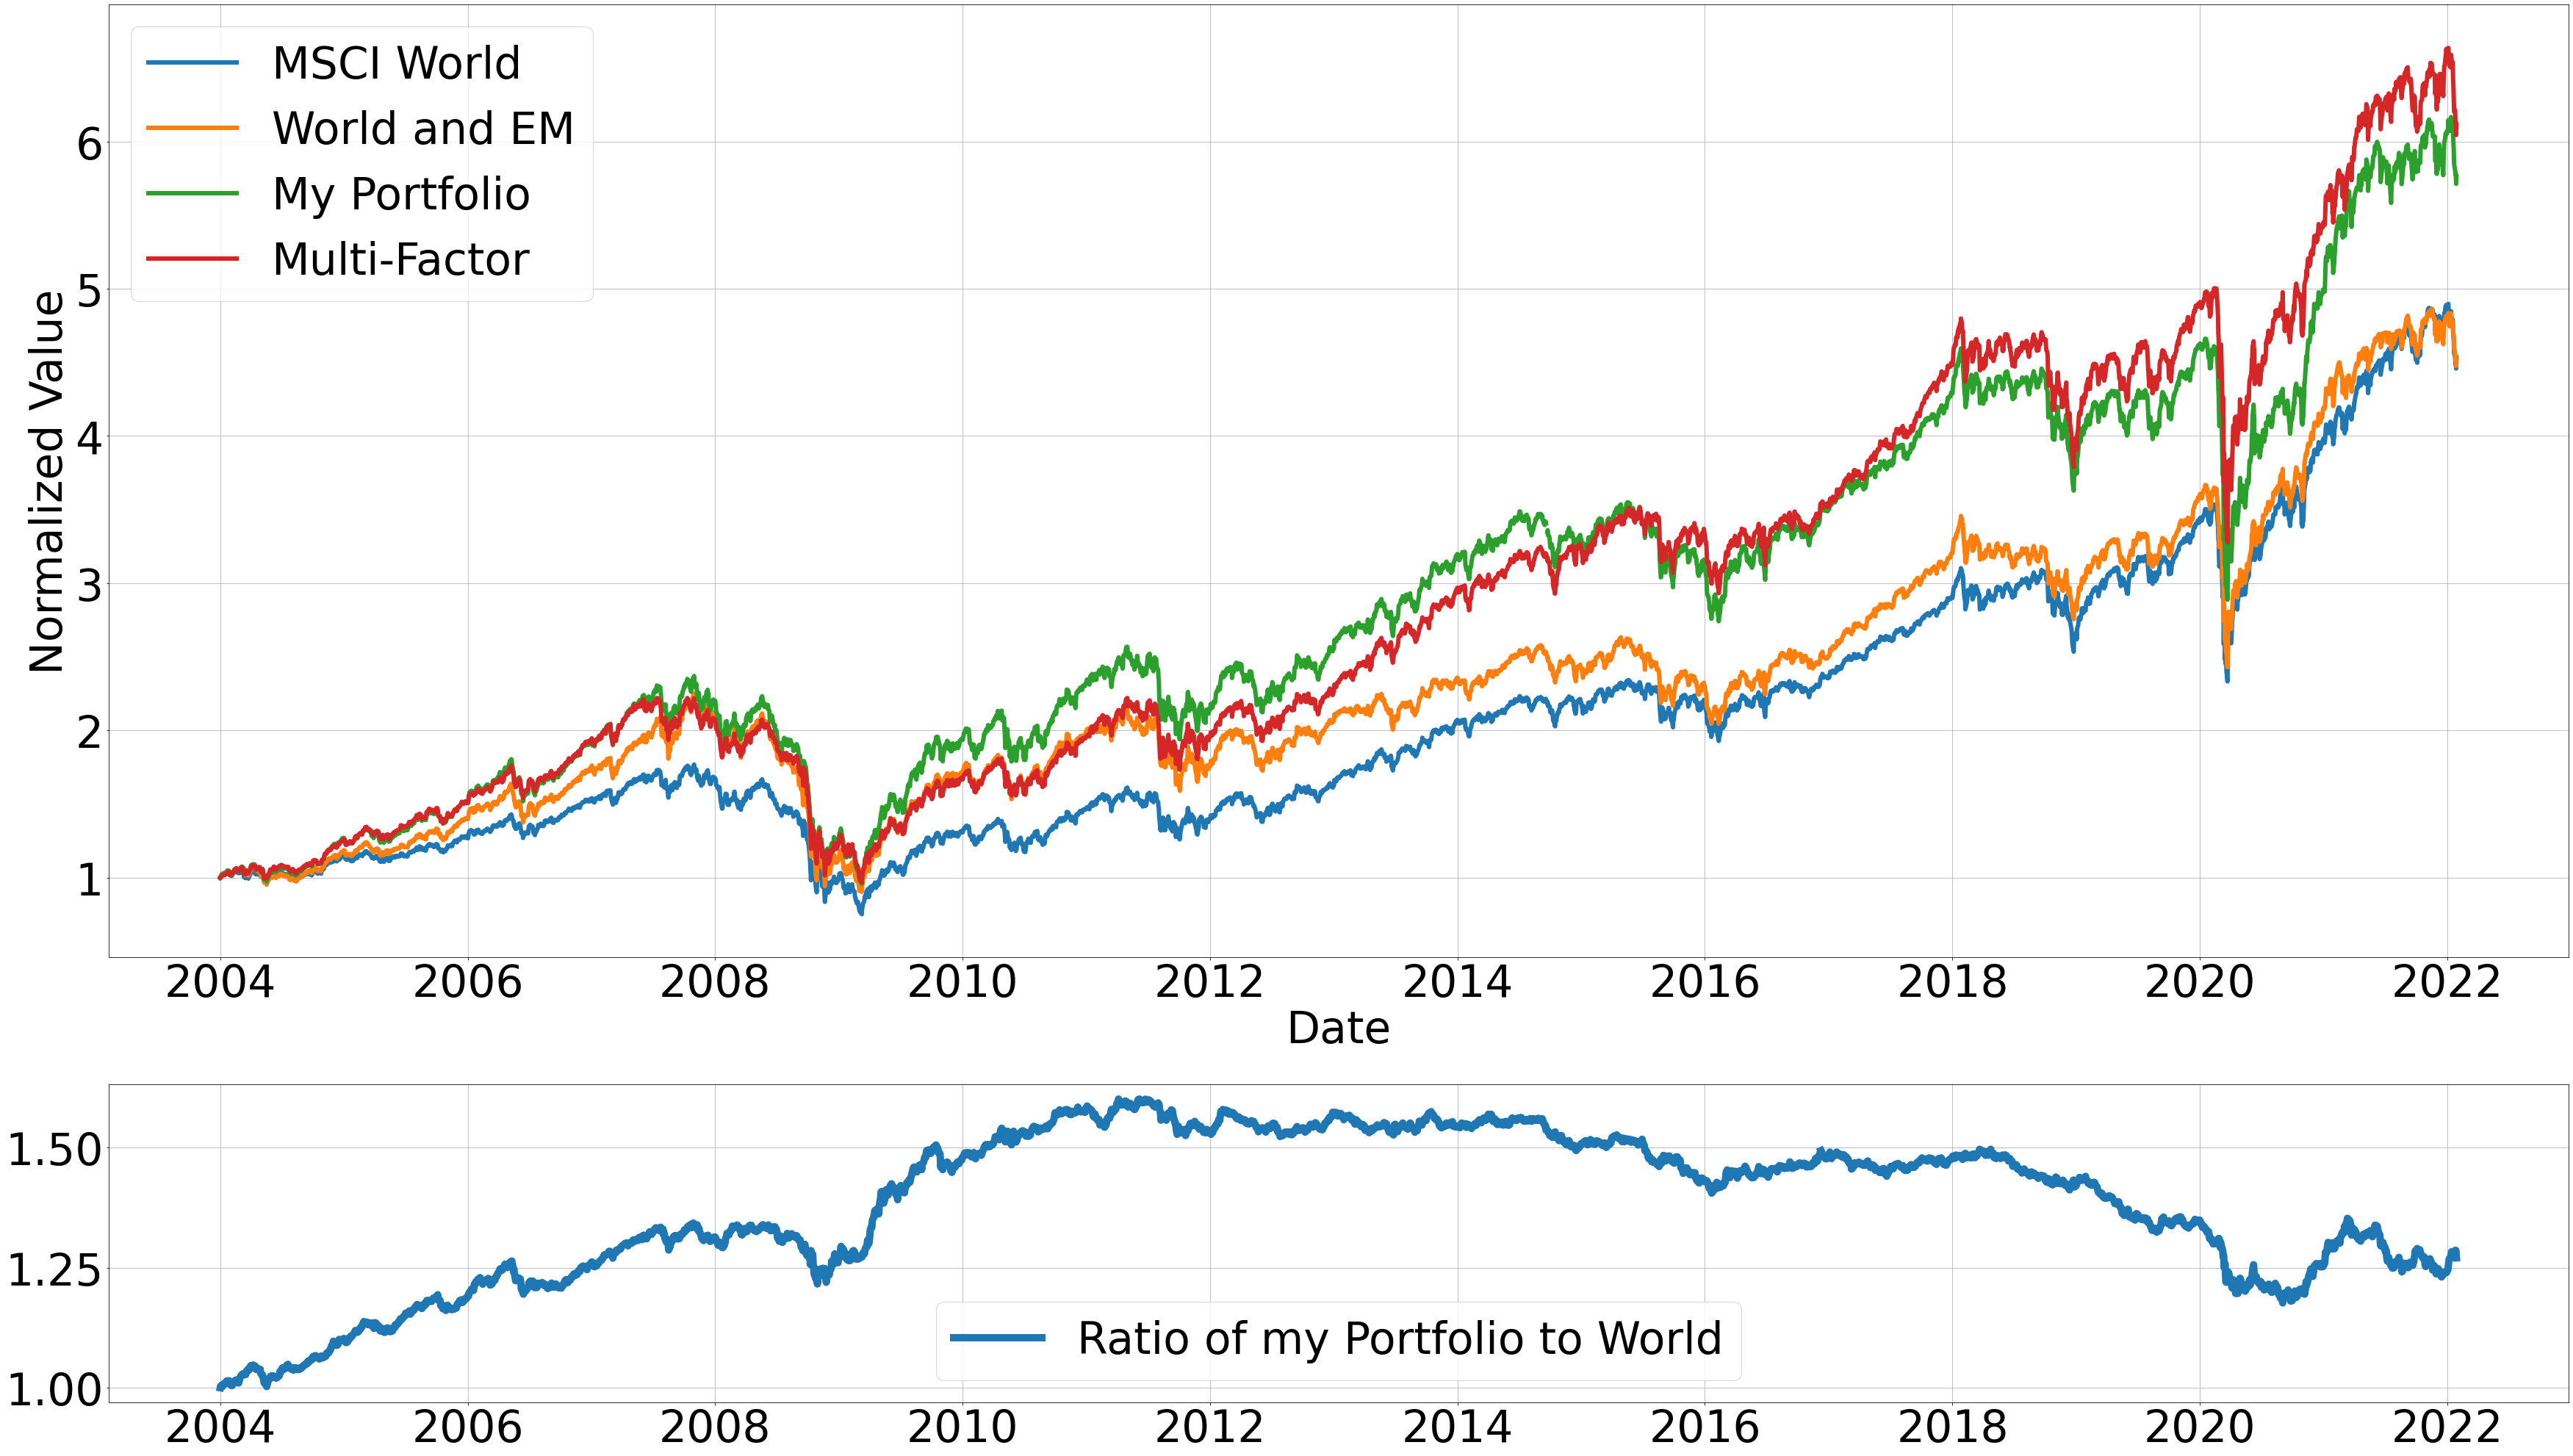

<Figure size 1440x864 with 0 Axes>

Current My PF/World Ratio:  1.2706501488846702


In [18]:
fontsize= 60
fig, ax = plt.subplots(2,gridspec_kw={'height_ratios': [3, 1]})
fig.patch.set_alpha(1)
for i in [0,1]:
    for a in ['x','y']:
        ax[i].tick_params(axis=a, labelsize=60 )
        ax[i].grid(True)
ax[0].set_xlabel('Date', fontsize = fontsize)
ax[0].set_ylabel('Normalized Value', fontsize = fontsize)
fig.set_size_inches(60, 35)
fig.show()

#
plt.figure(figsize=(20, 12))
for k in ["MSCI World","World and EM","My Portfolio","Multi-Factor"]:
    ax[0].plot(df["date"],df[k], label=k,linewidth=6)
df["My Portfolio to World"] = df["My Portfolio"]/df["MSCI World"]  

ax[1].plot(df["date"],df["My Portfolio to World"],linewidth=10,label="Ratio of my Portfolio to World")

ax[0].legend(prop={'size':fontsize})
ax[1].legend(prop={'size':fontsize})
plt.show()
print("Current My PF/World Ratio: ",df["My Portfolio to World"].iloc[-1])


In [21]:

def comparison_plot(factor,comparison="MSCI World"):
    fontsize= 60

    fig, ax = plt.subplots(2,gridspec_kw={'height_ratios': [3, 1]})
    fig.patch.set_alpha(1)
    for i in [0,1]:
        for a in ['x','y']:
            ax[i].tick_params(axis=a, labelsize=60 )
            ax[i].grid(True)
    ax[0].set_xlabel('Date', fontsize = fontsize)
    ax[0].set_ylabel('Normalized Value', fontsize = fontsize)
    fig.set_size_inches(60, 35)
    fig.show()

    #df = df.reset_index()
    plt.figure(figsize=(20, 12))
    for k in [comparison,factor]:
        ax[0].plot(df["date"],df[k], label=k,linewidth=6)
    df[factor+" to "+comparison] = df[factor]/df[comparison]  

    ax[1].plot(df["date"],df[factor+" to "+comparison],linewidth=10,label="Ratio of "+factor+" to "+comparison)

    ax[0].legend(prop={'size':fontsize})
    ax[1].legend(prop={'size':fontsize})
    plt.show()
    #print("Current Value/World Ratio: ",df["Value to World"].iloc[-1])

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_35520/2180213954.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


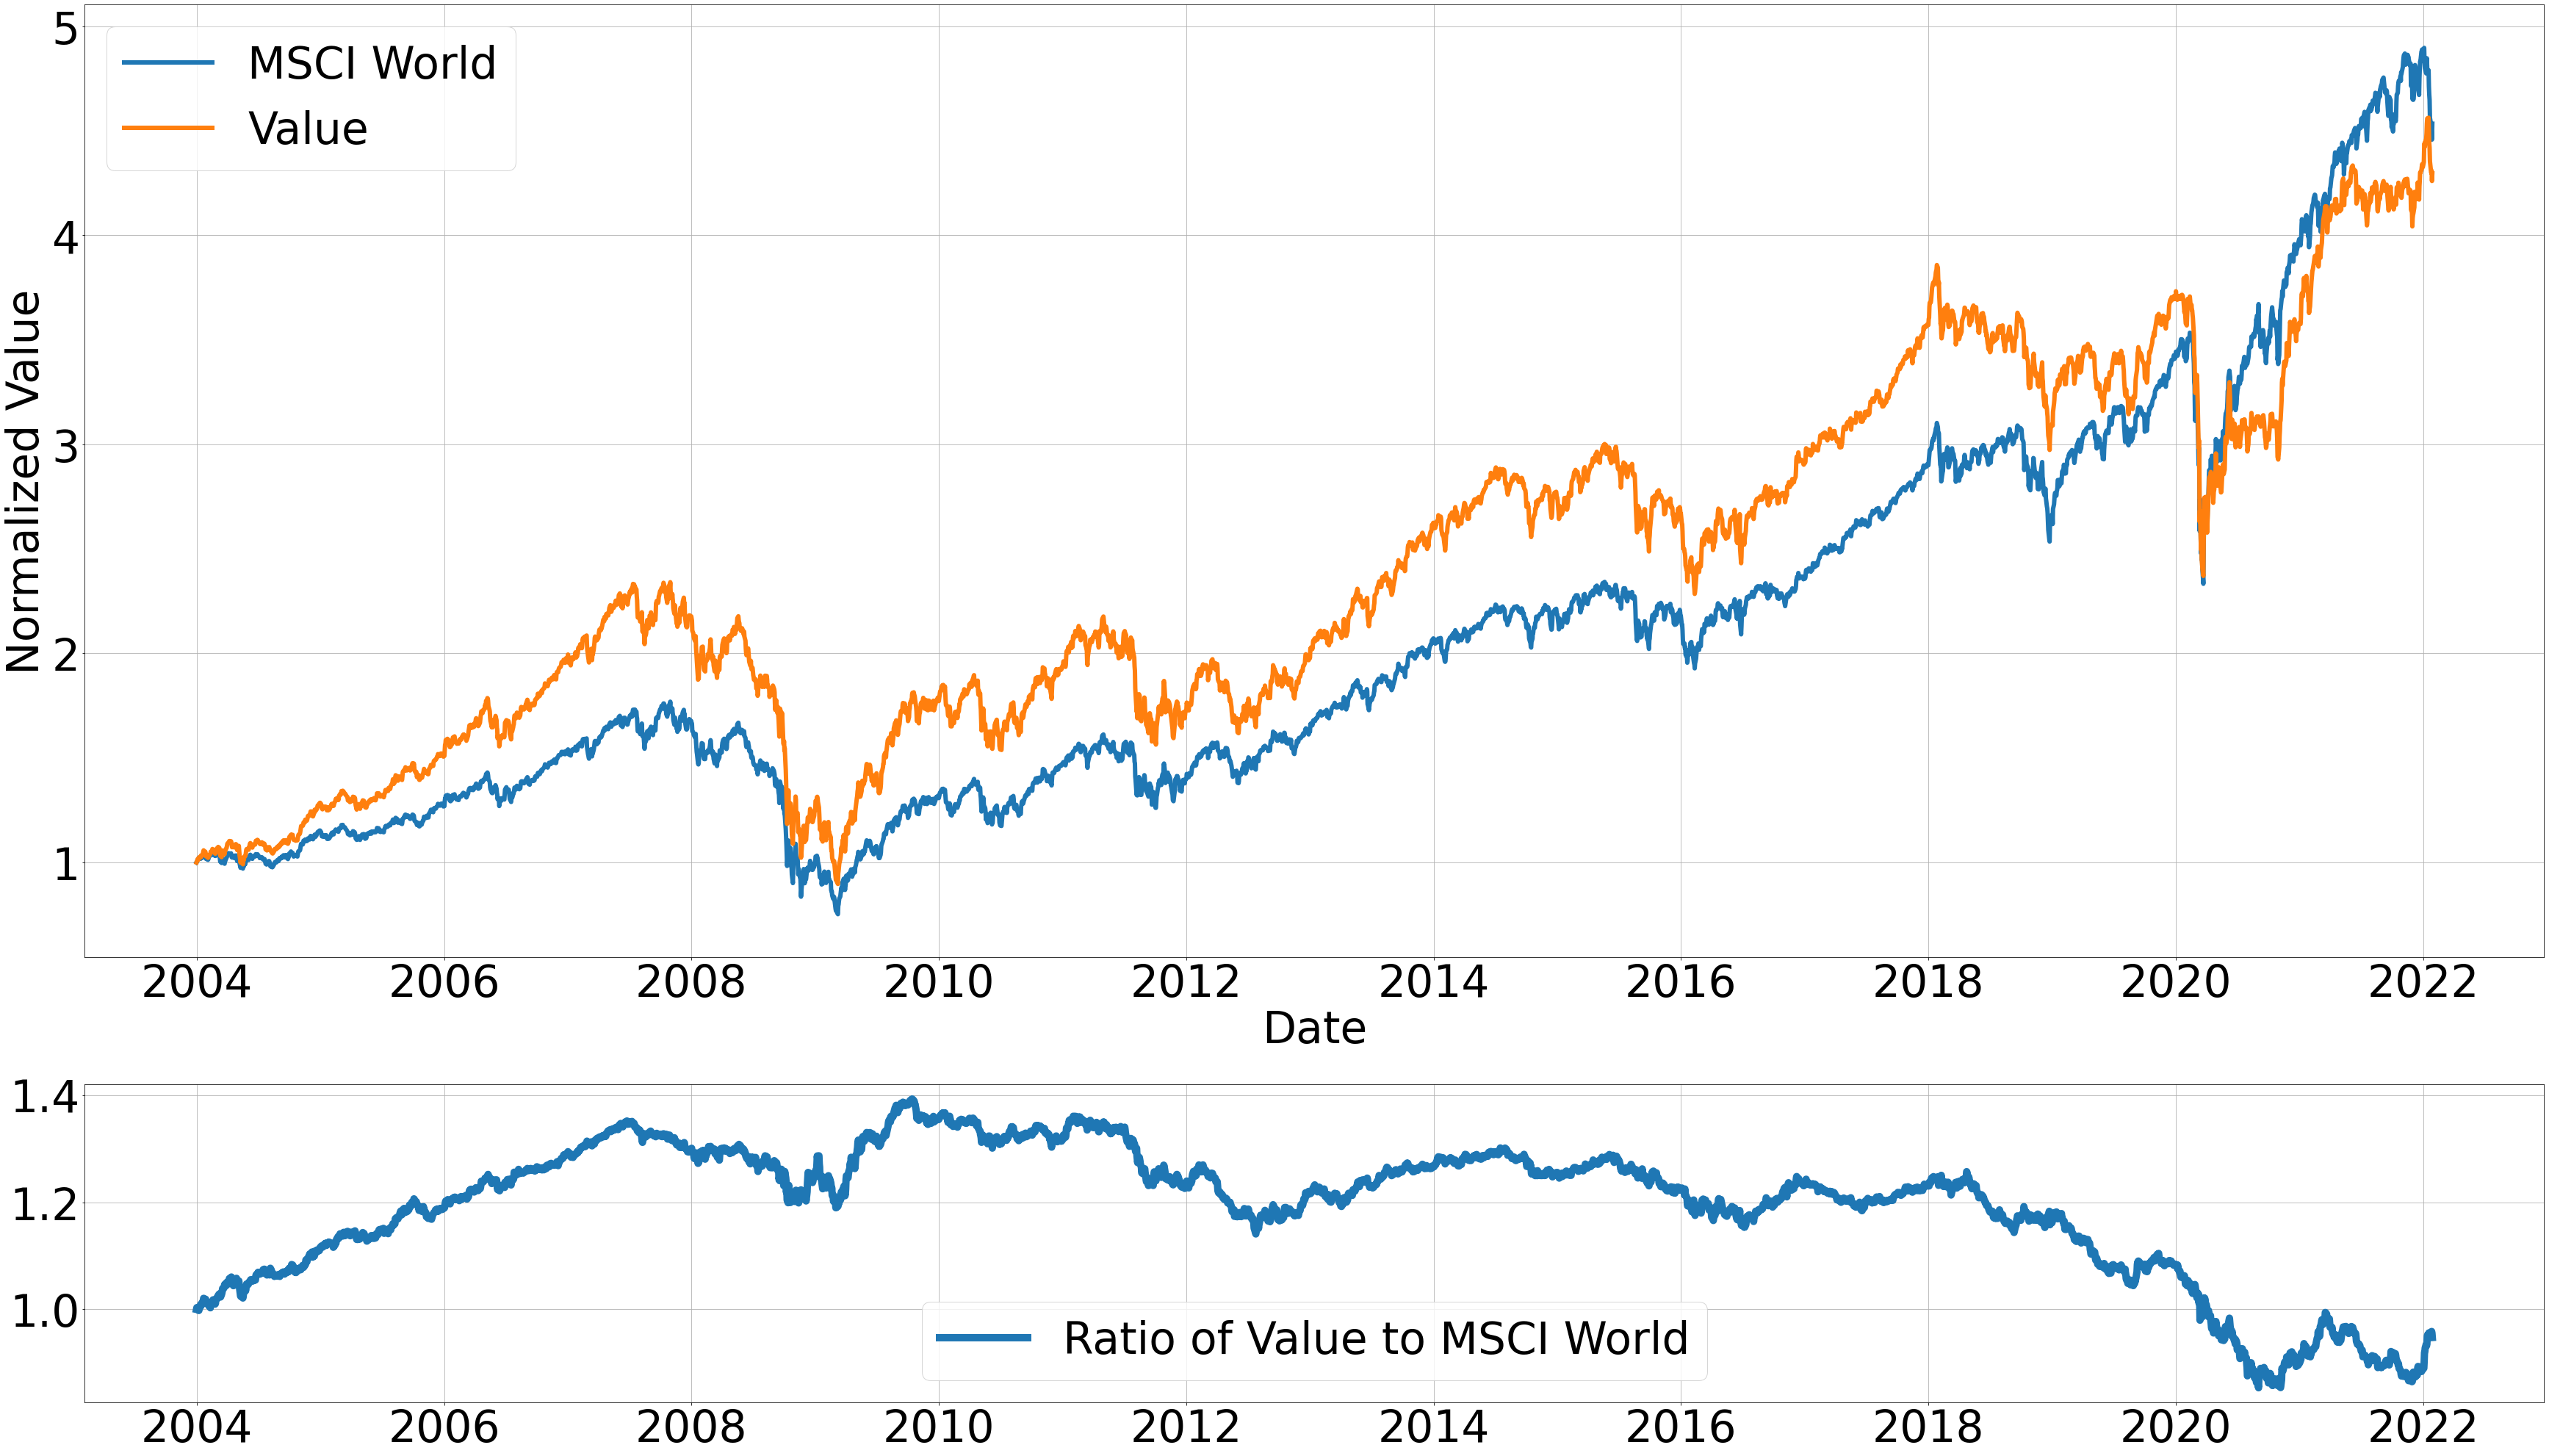

<Figure size 1440x864 with 0 Axes>

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_35520/2180213954.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


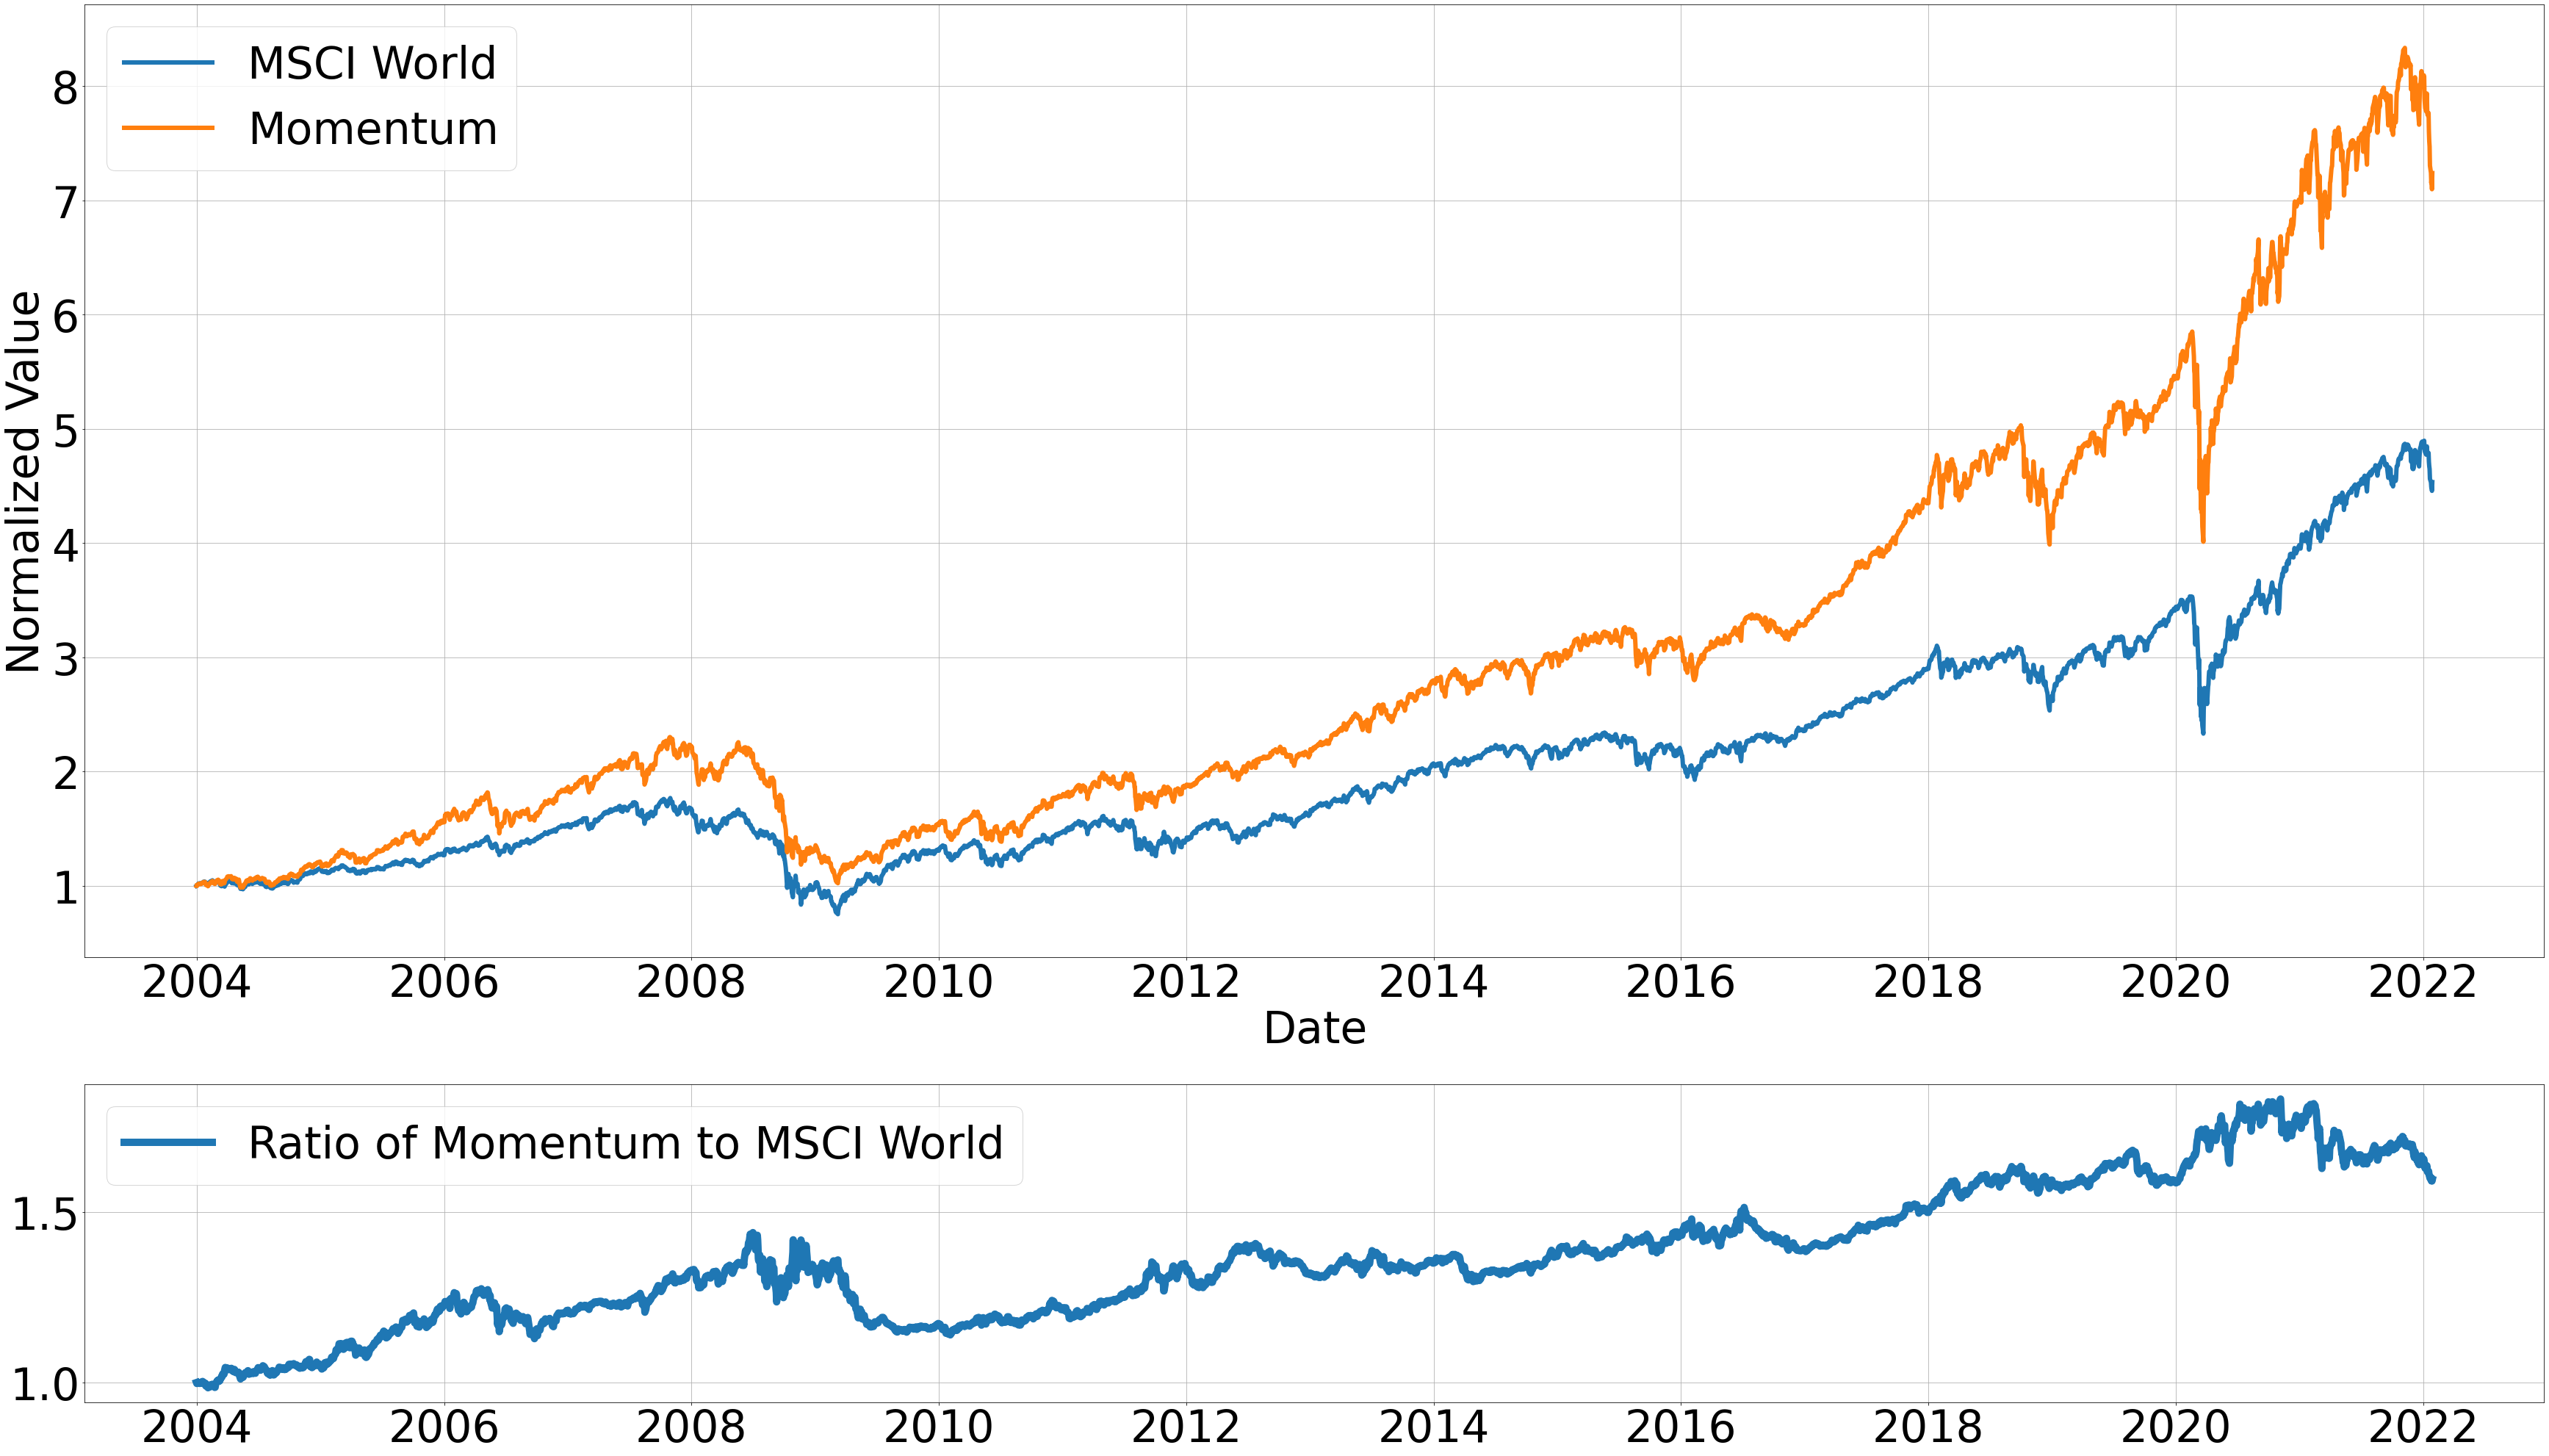

<Figure size 1440x864 with 0 Axes>

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_35520/2180213954.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


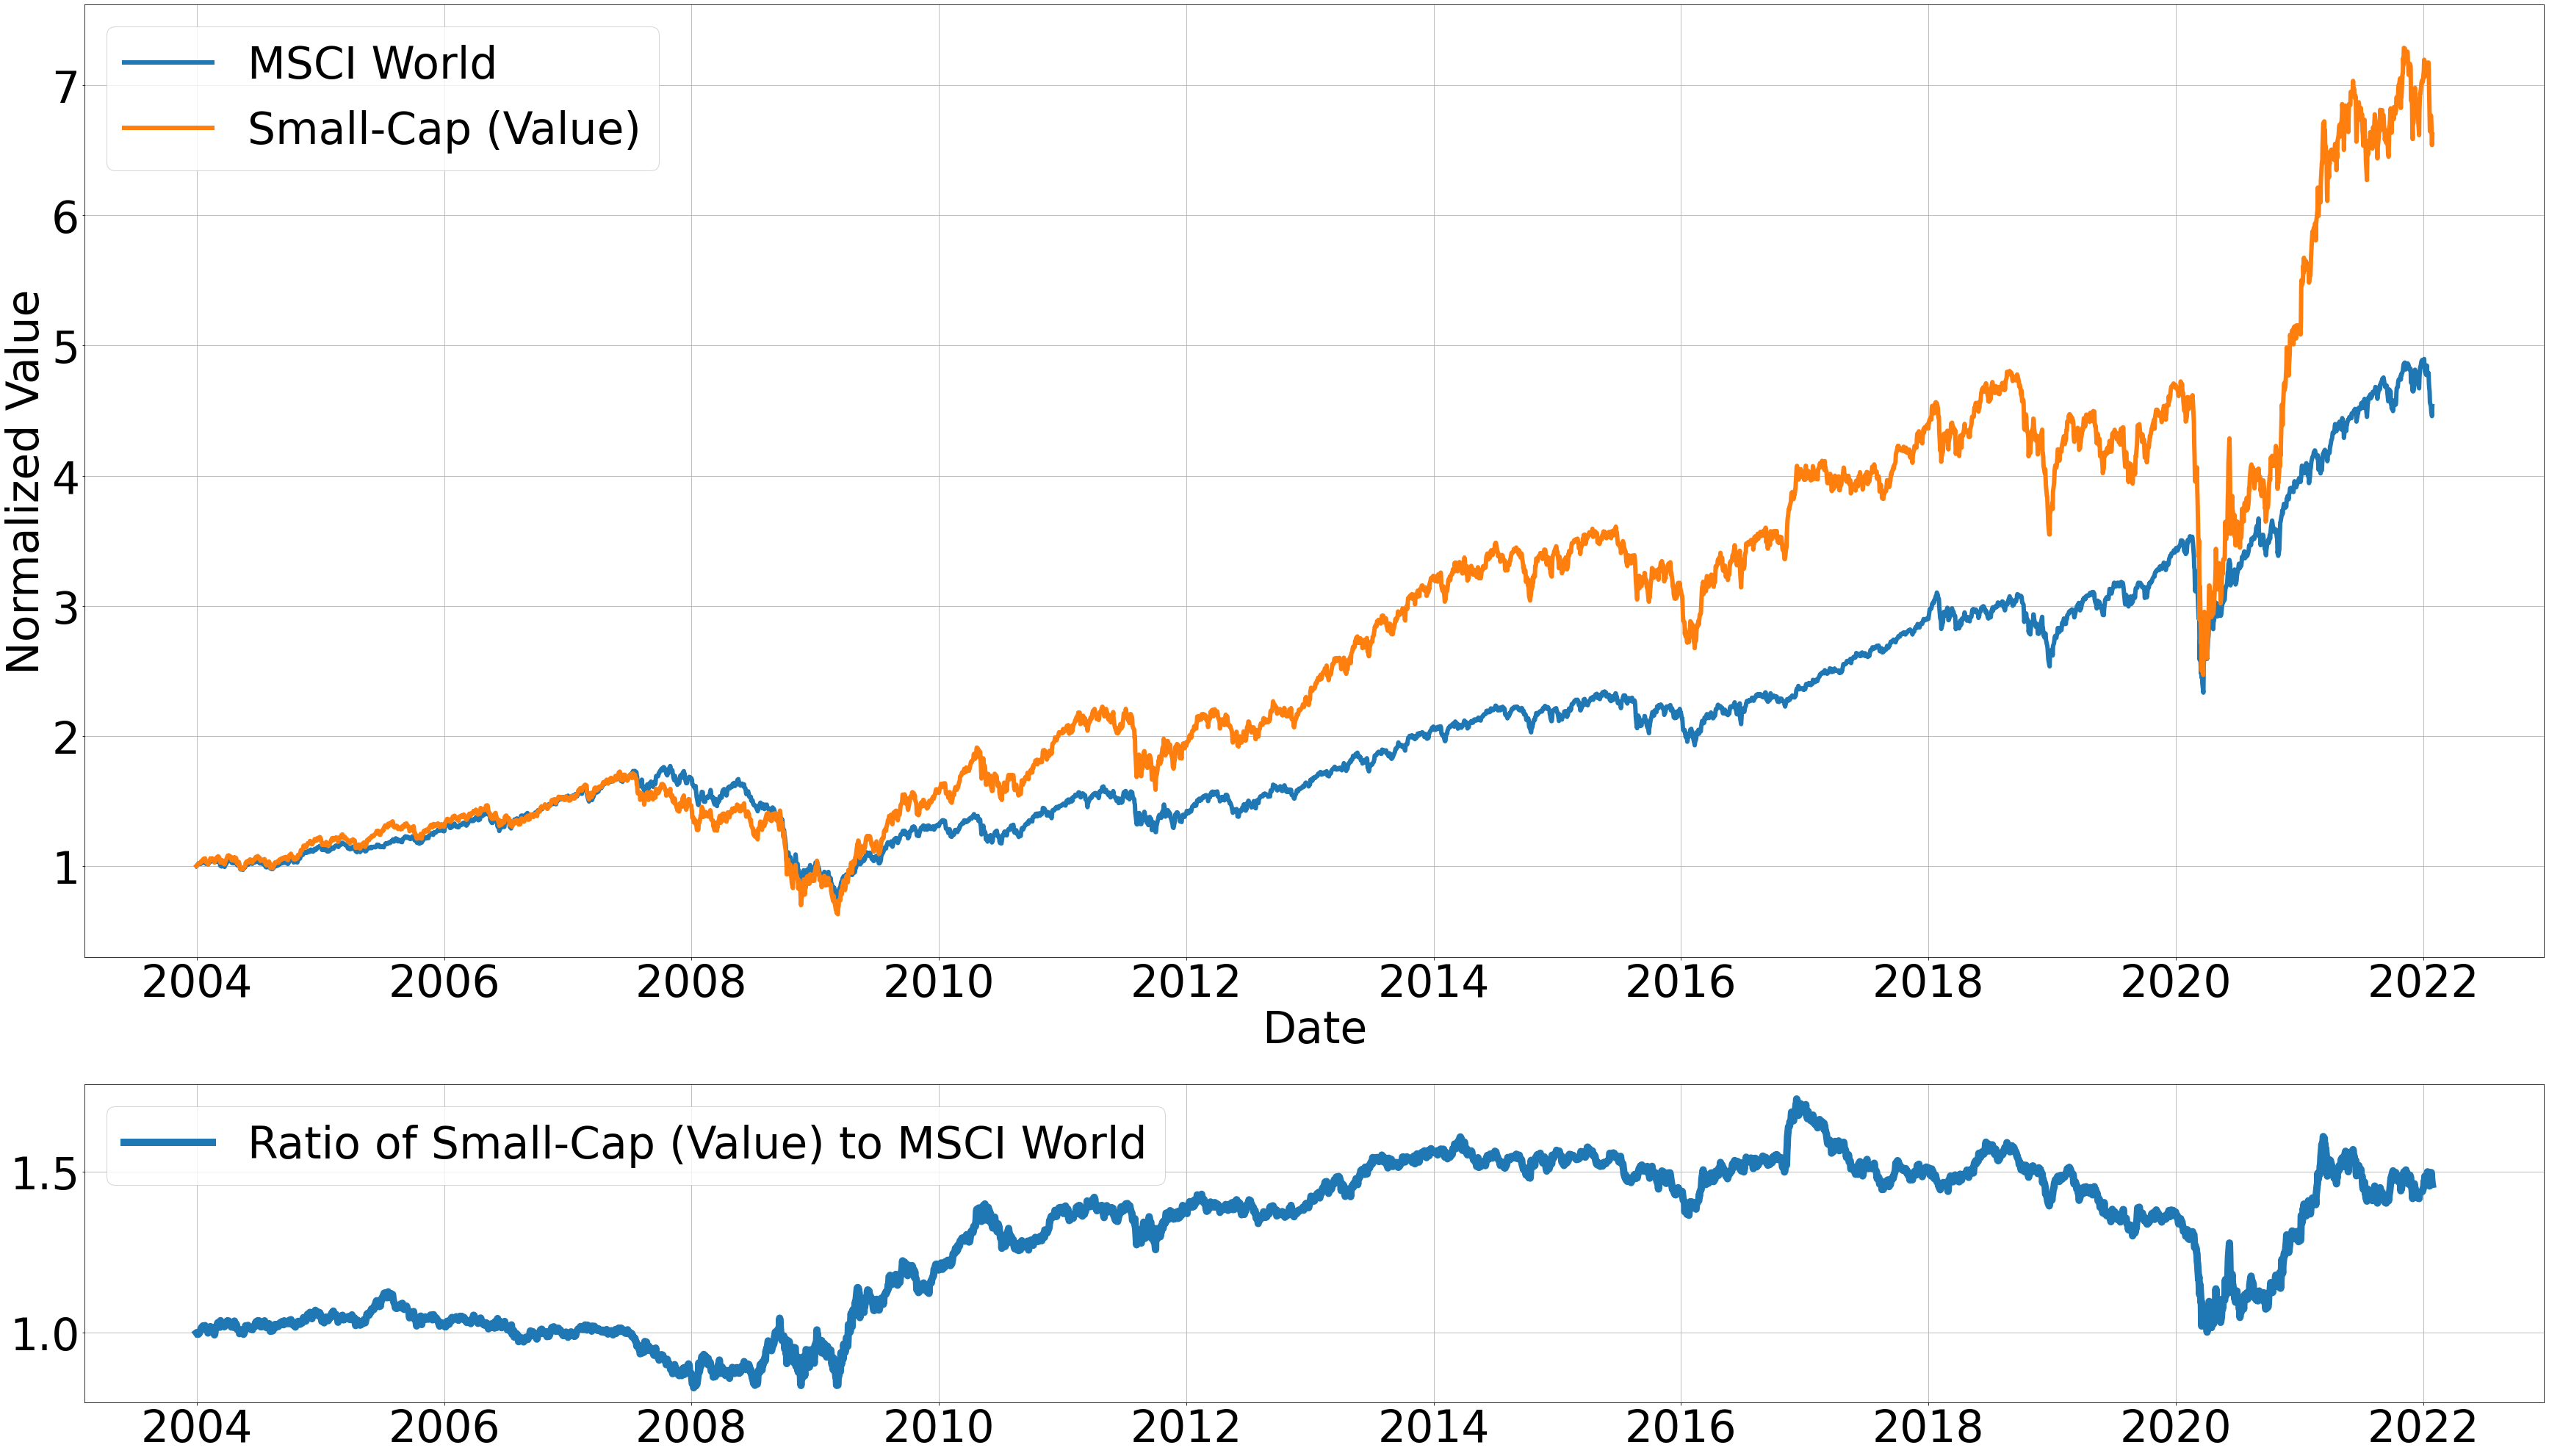

<Figure size 1440x864 with 0 Axes>

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_35520/2180213954.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


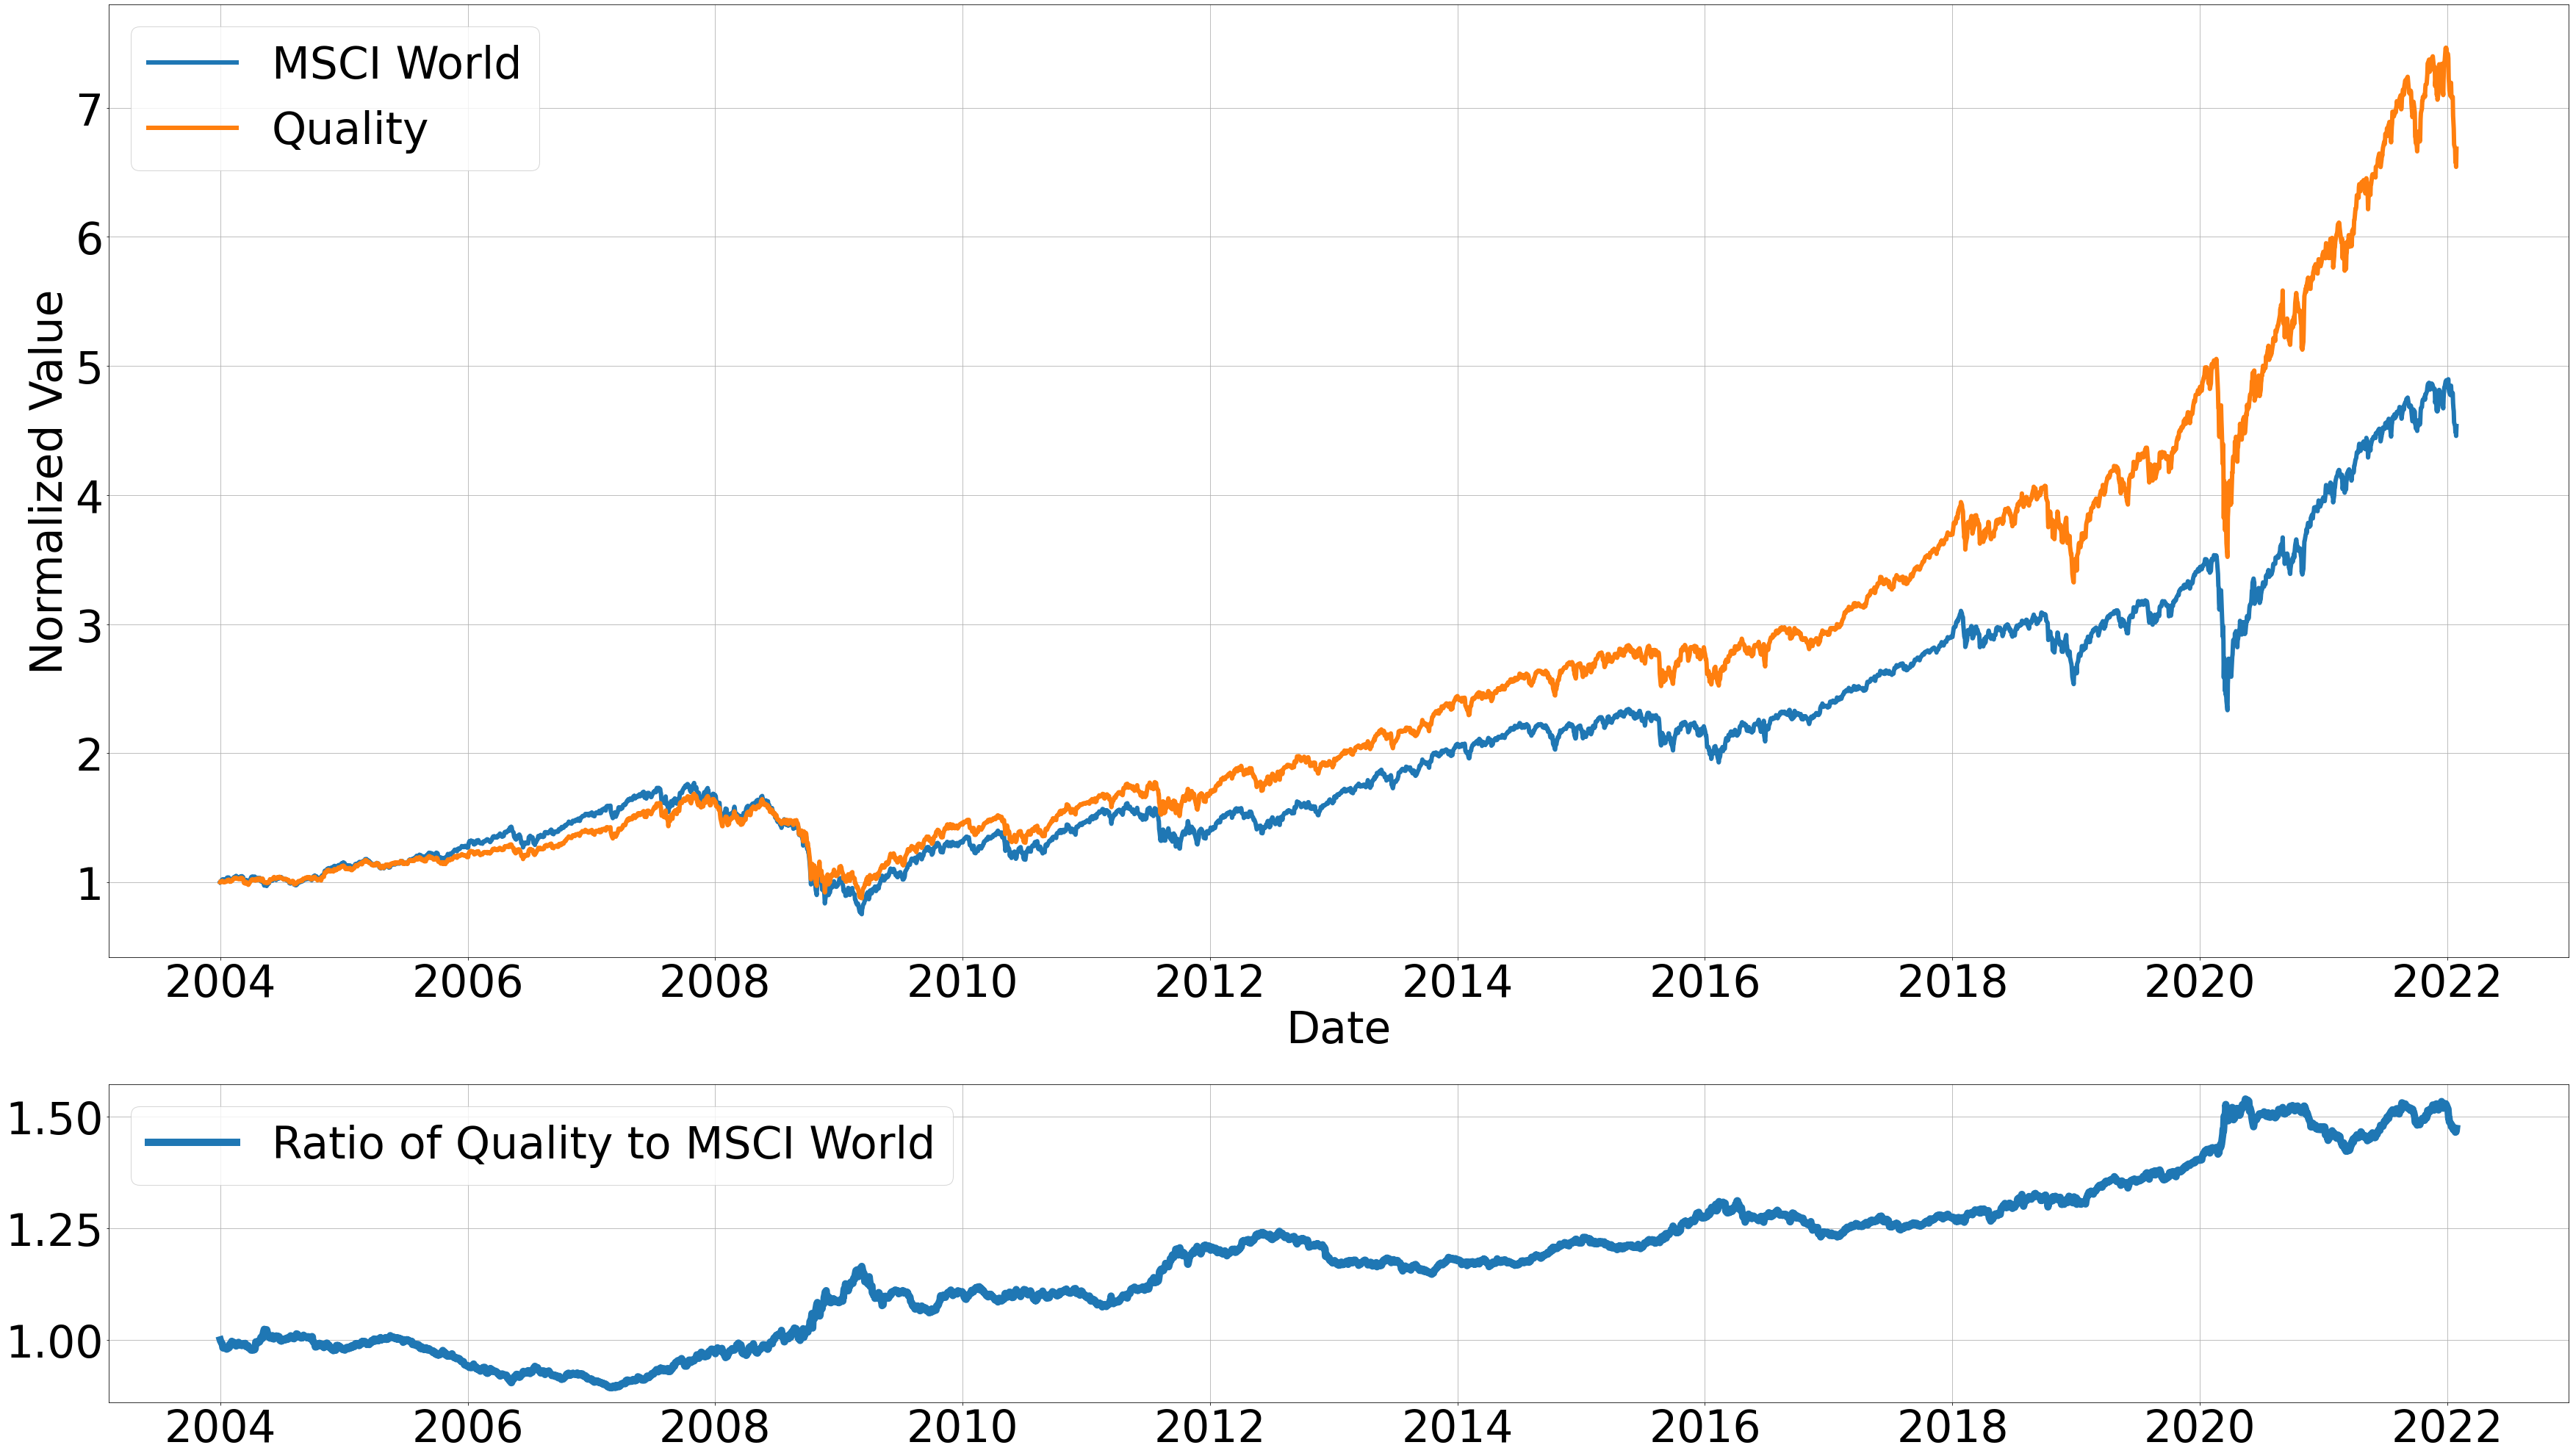

<Figure size 1440x864 with 0 Axes>

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_35520/2180213954.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


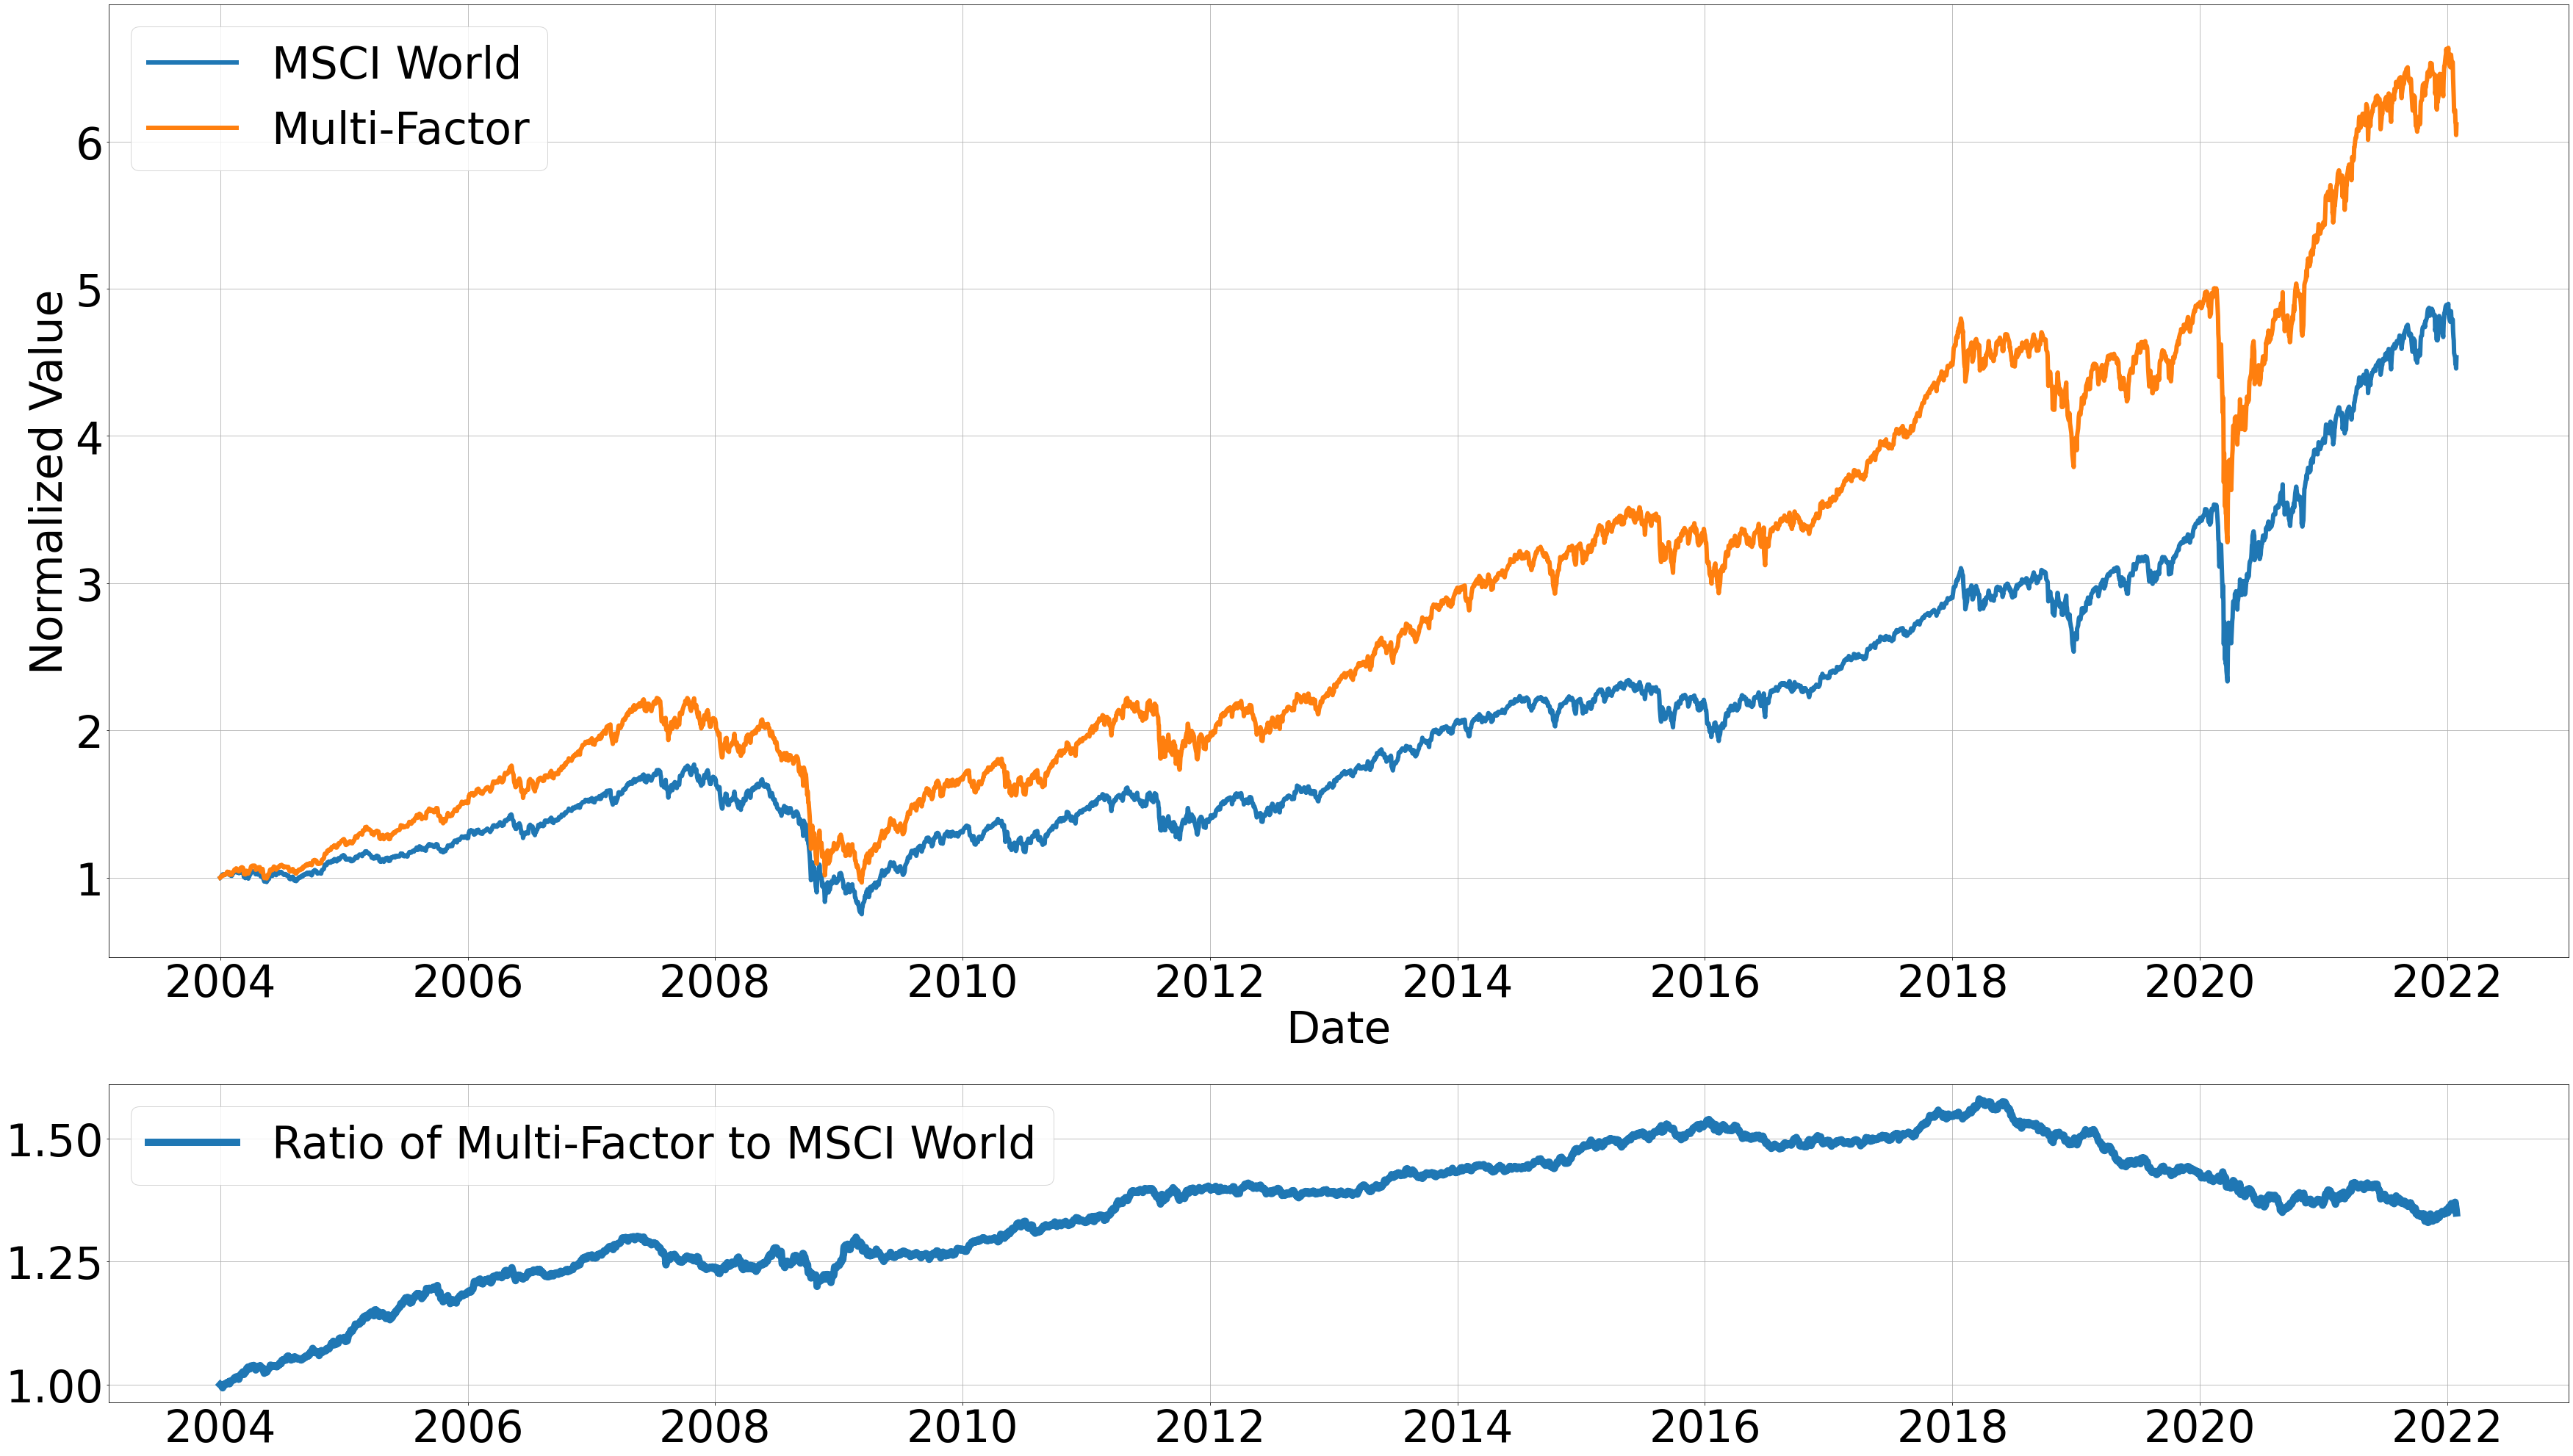

<Figure size 1440x864 with 0 Axes>

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_35520/2180213954.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


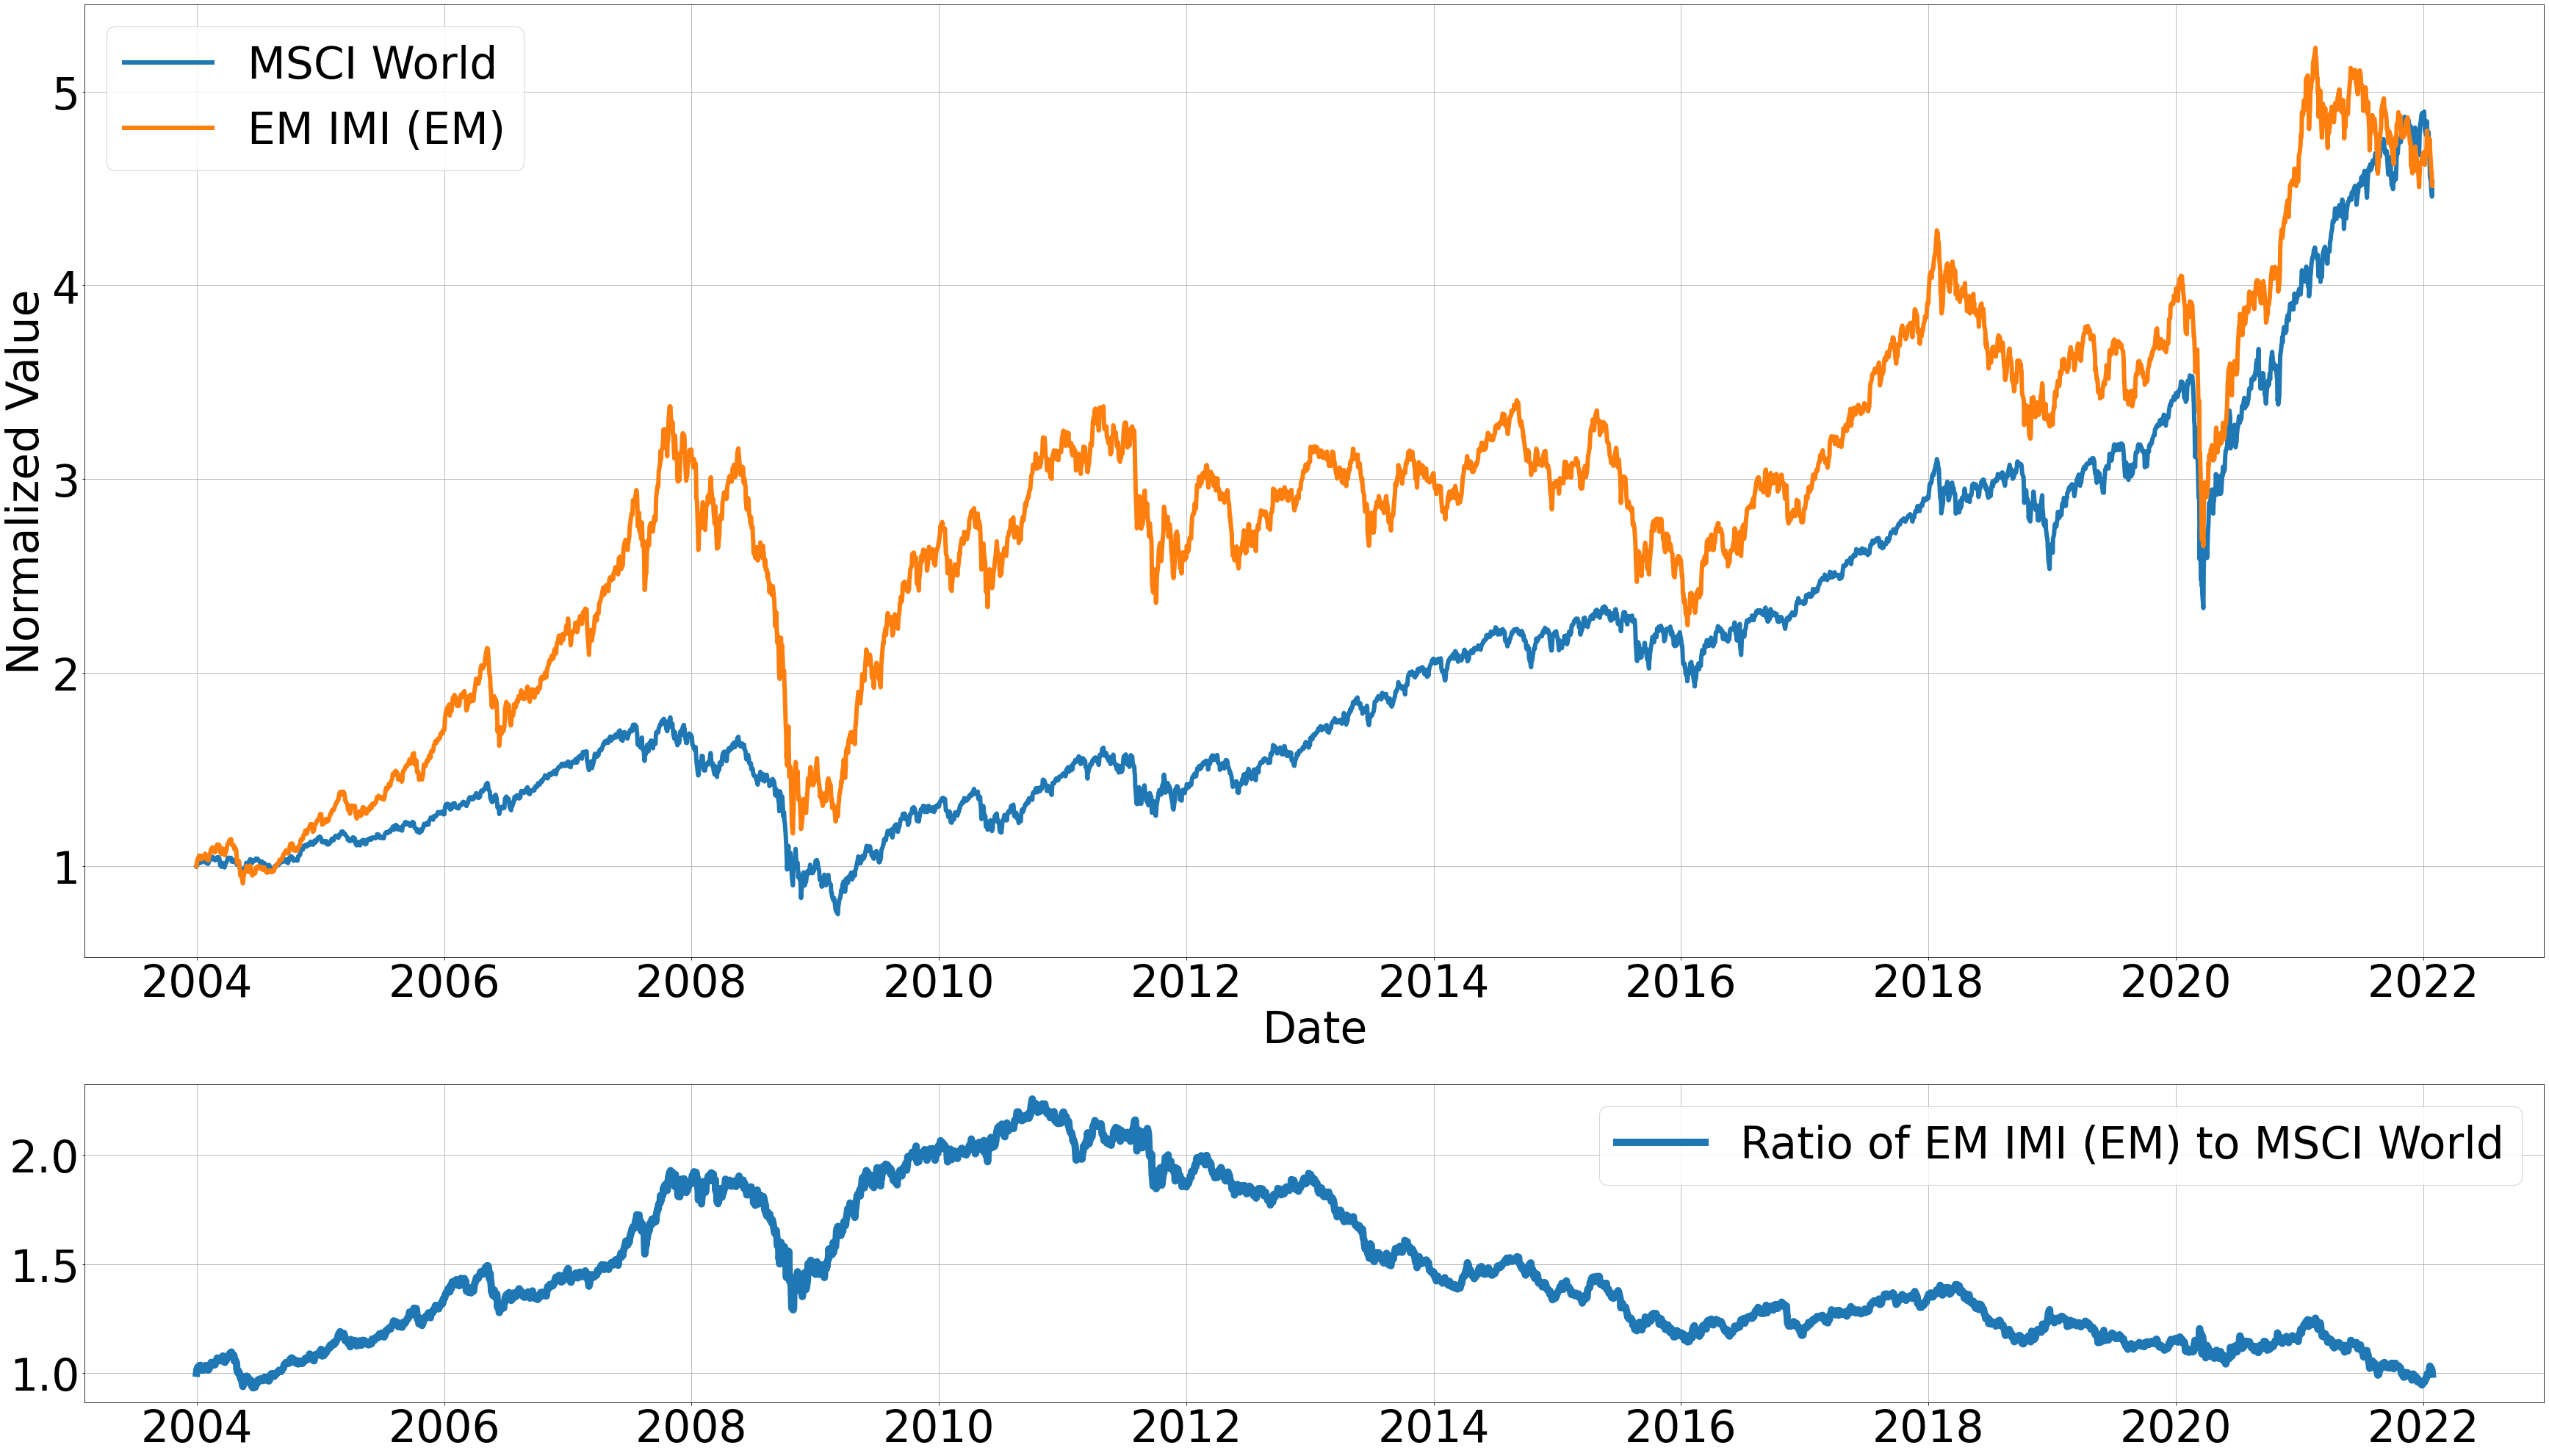

<Figure size 1440x864 with 0 Axes>

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_35520/2180213954.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


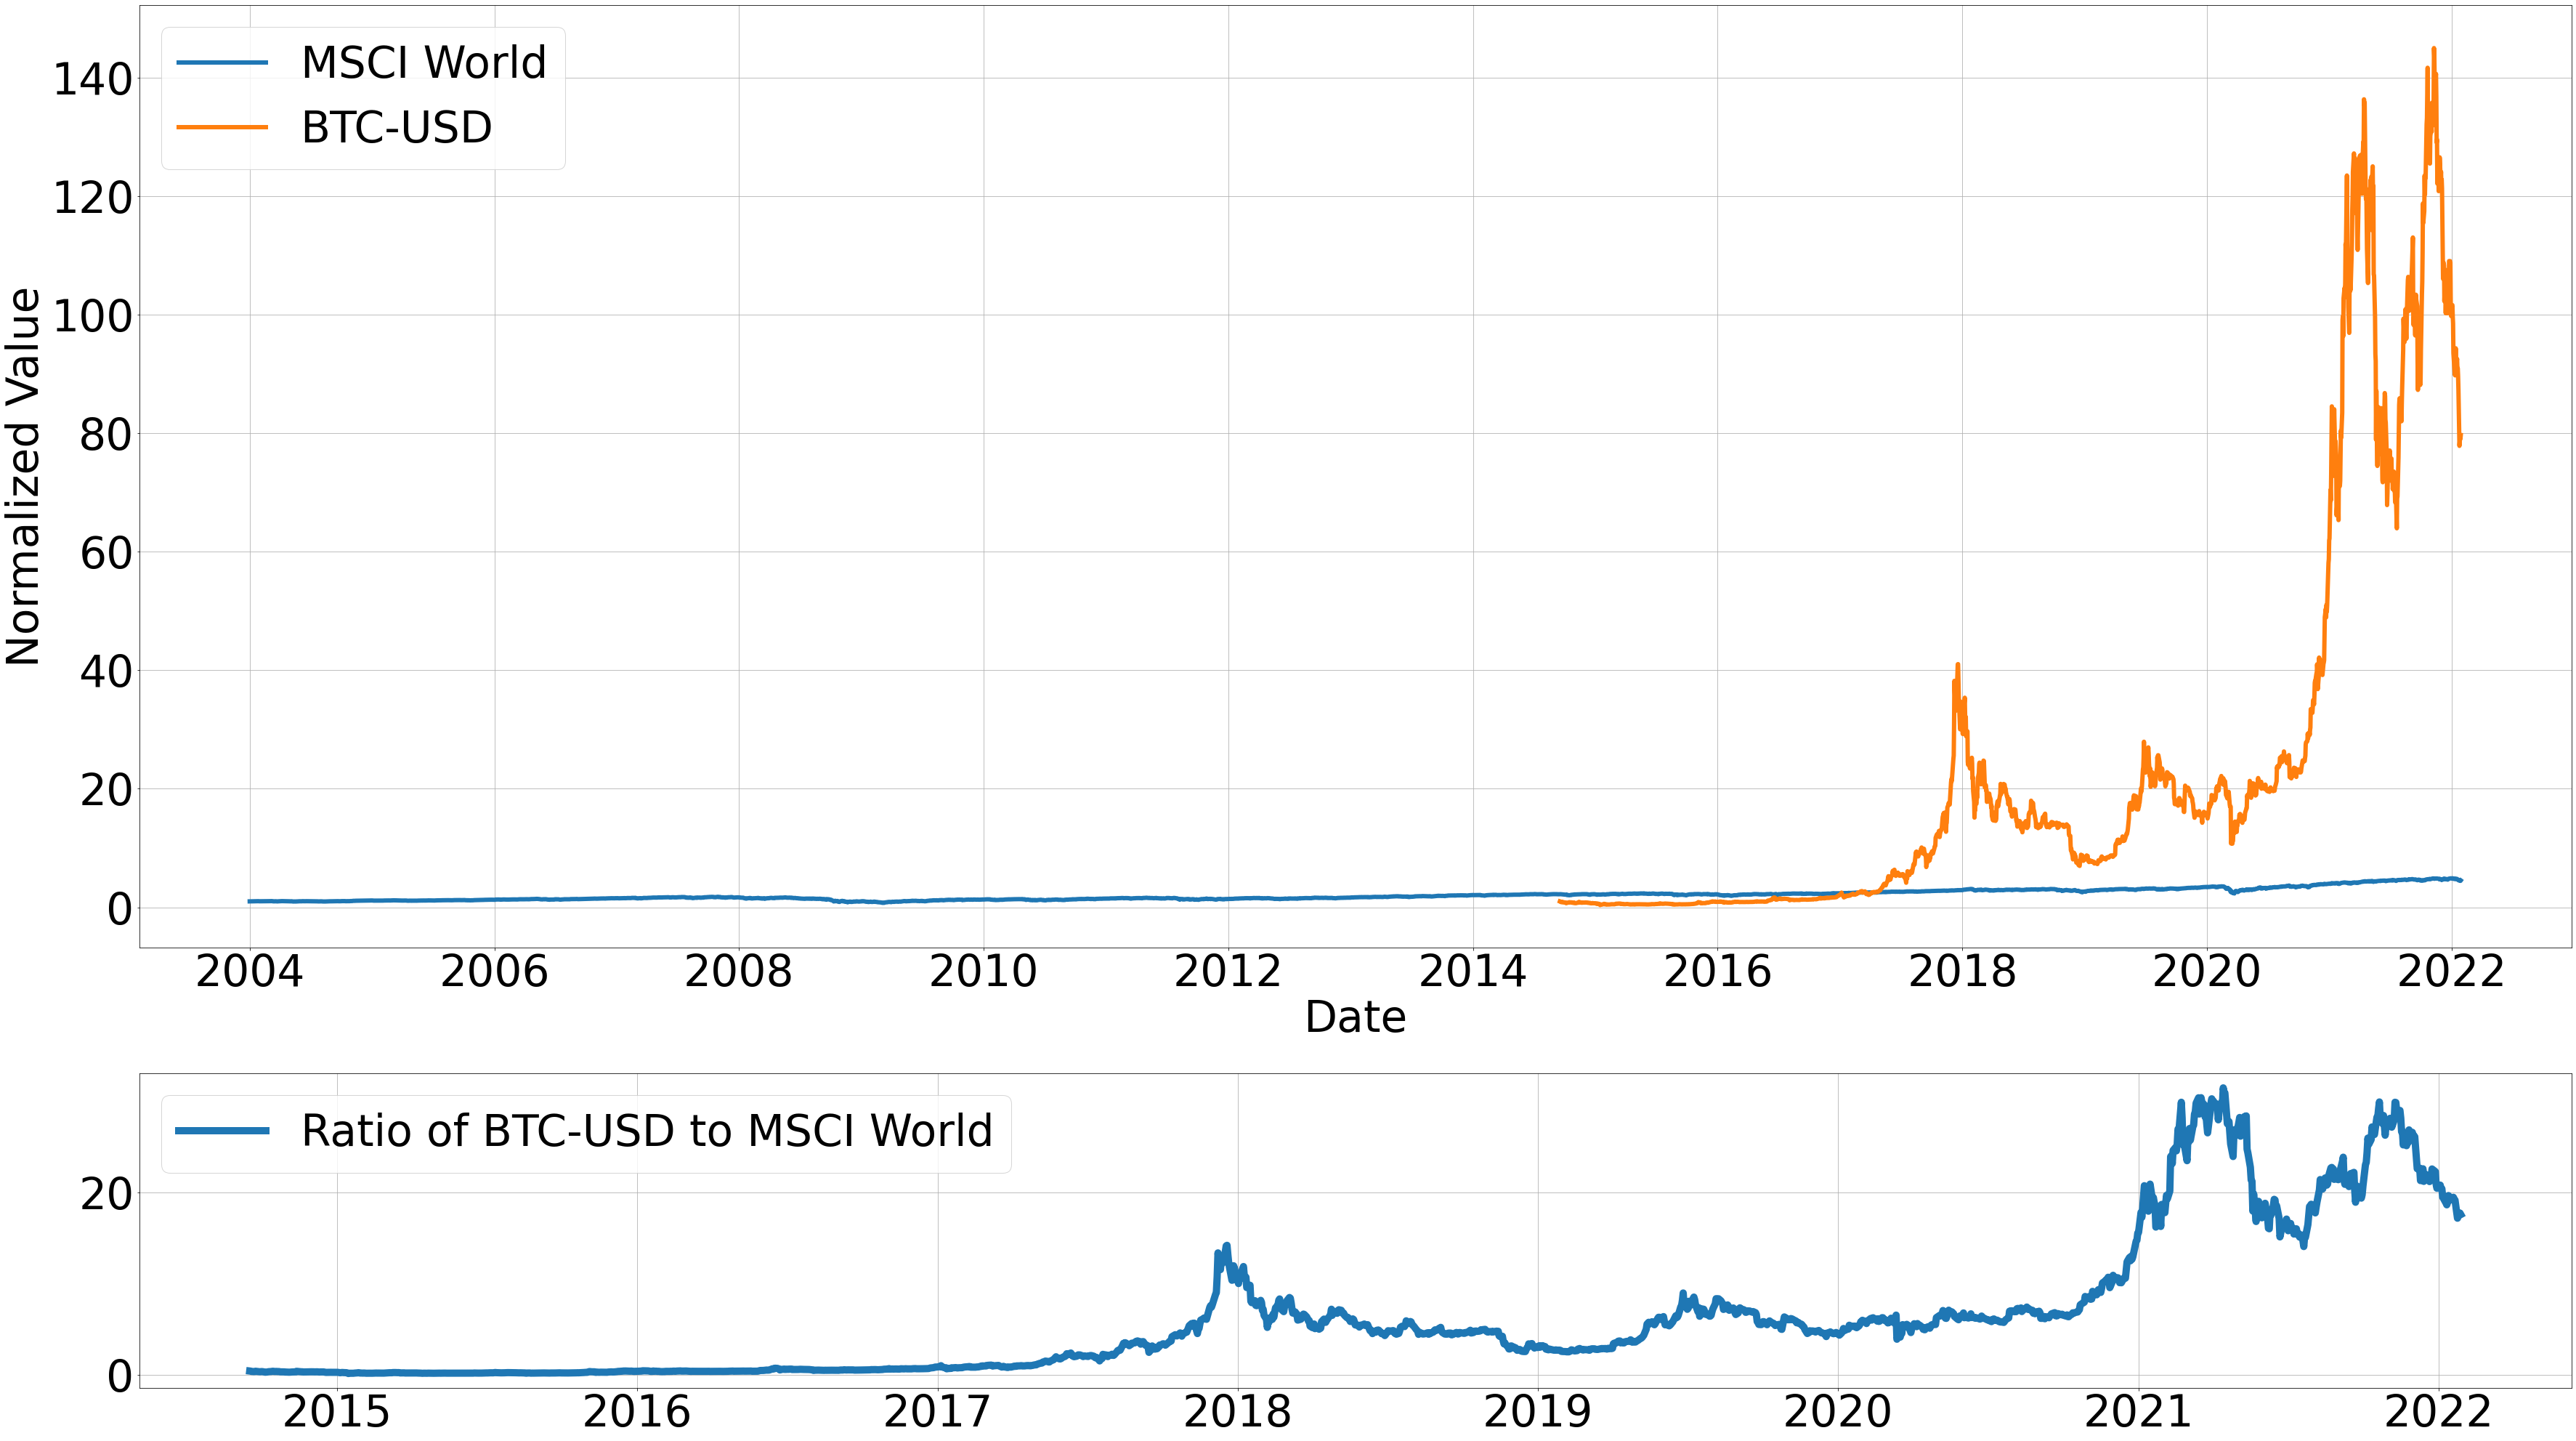

<Figure size 1440x864 with 0 Axes>

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_35520/2180213954.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


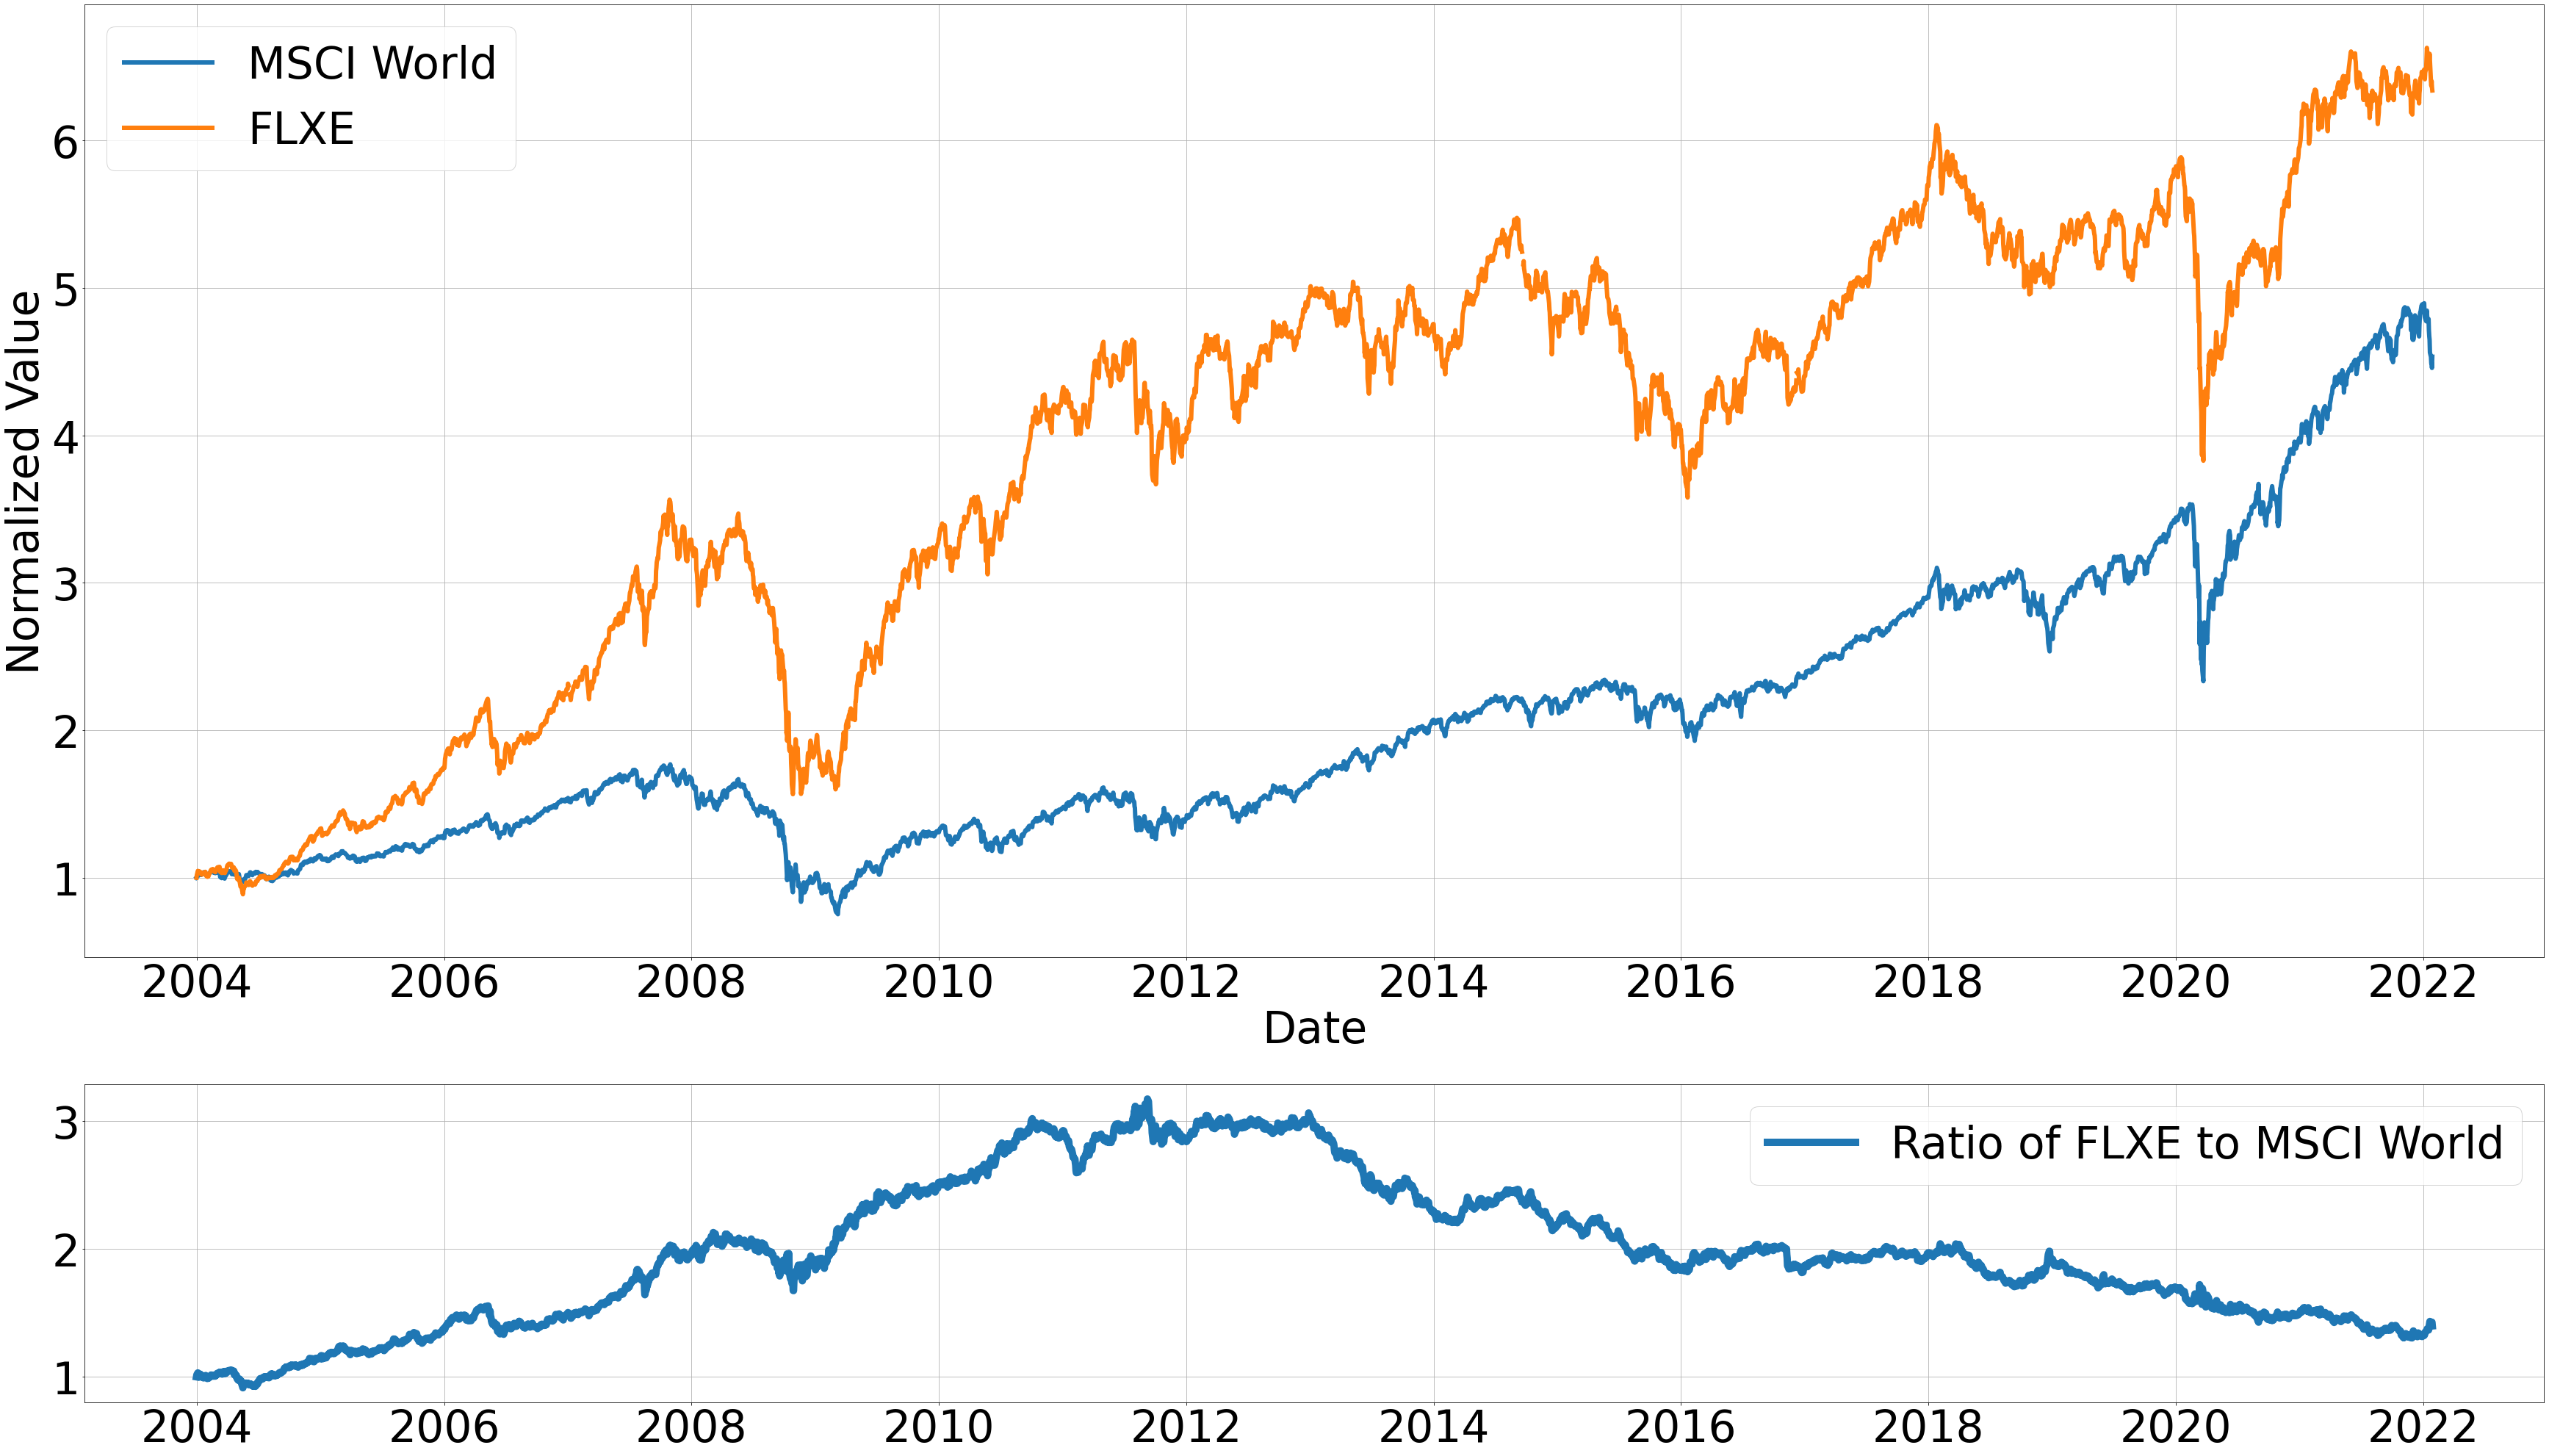

<Figure size 1440x864 with 0 Axes>

In [22]:
for factor in ["Value","Momentum","Small-Cap (Value)","Quality","Multi-Factor","EM IMI (EM)","BTC-USD","FLXE"]:
    
    comparison_plot(factor)

In [24]:
df.to_csv("current_etf_data.csv")

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_35520/2180213954.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


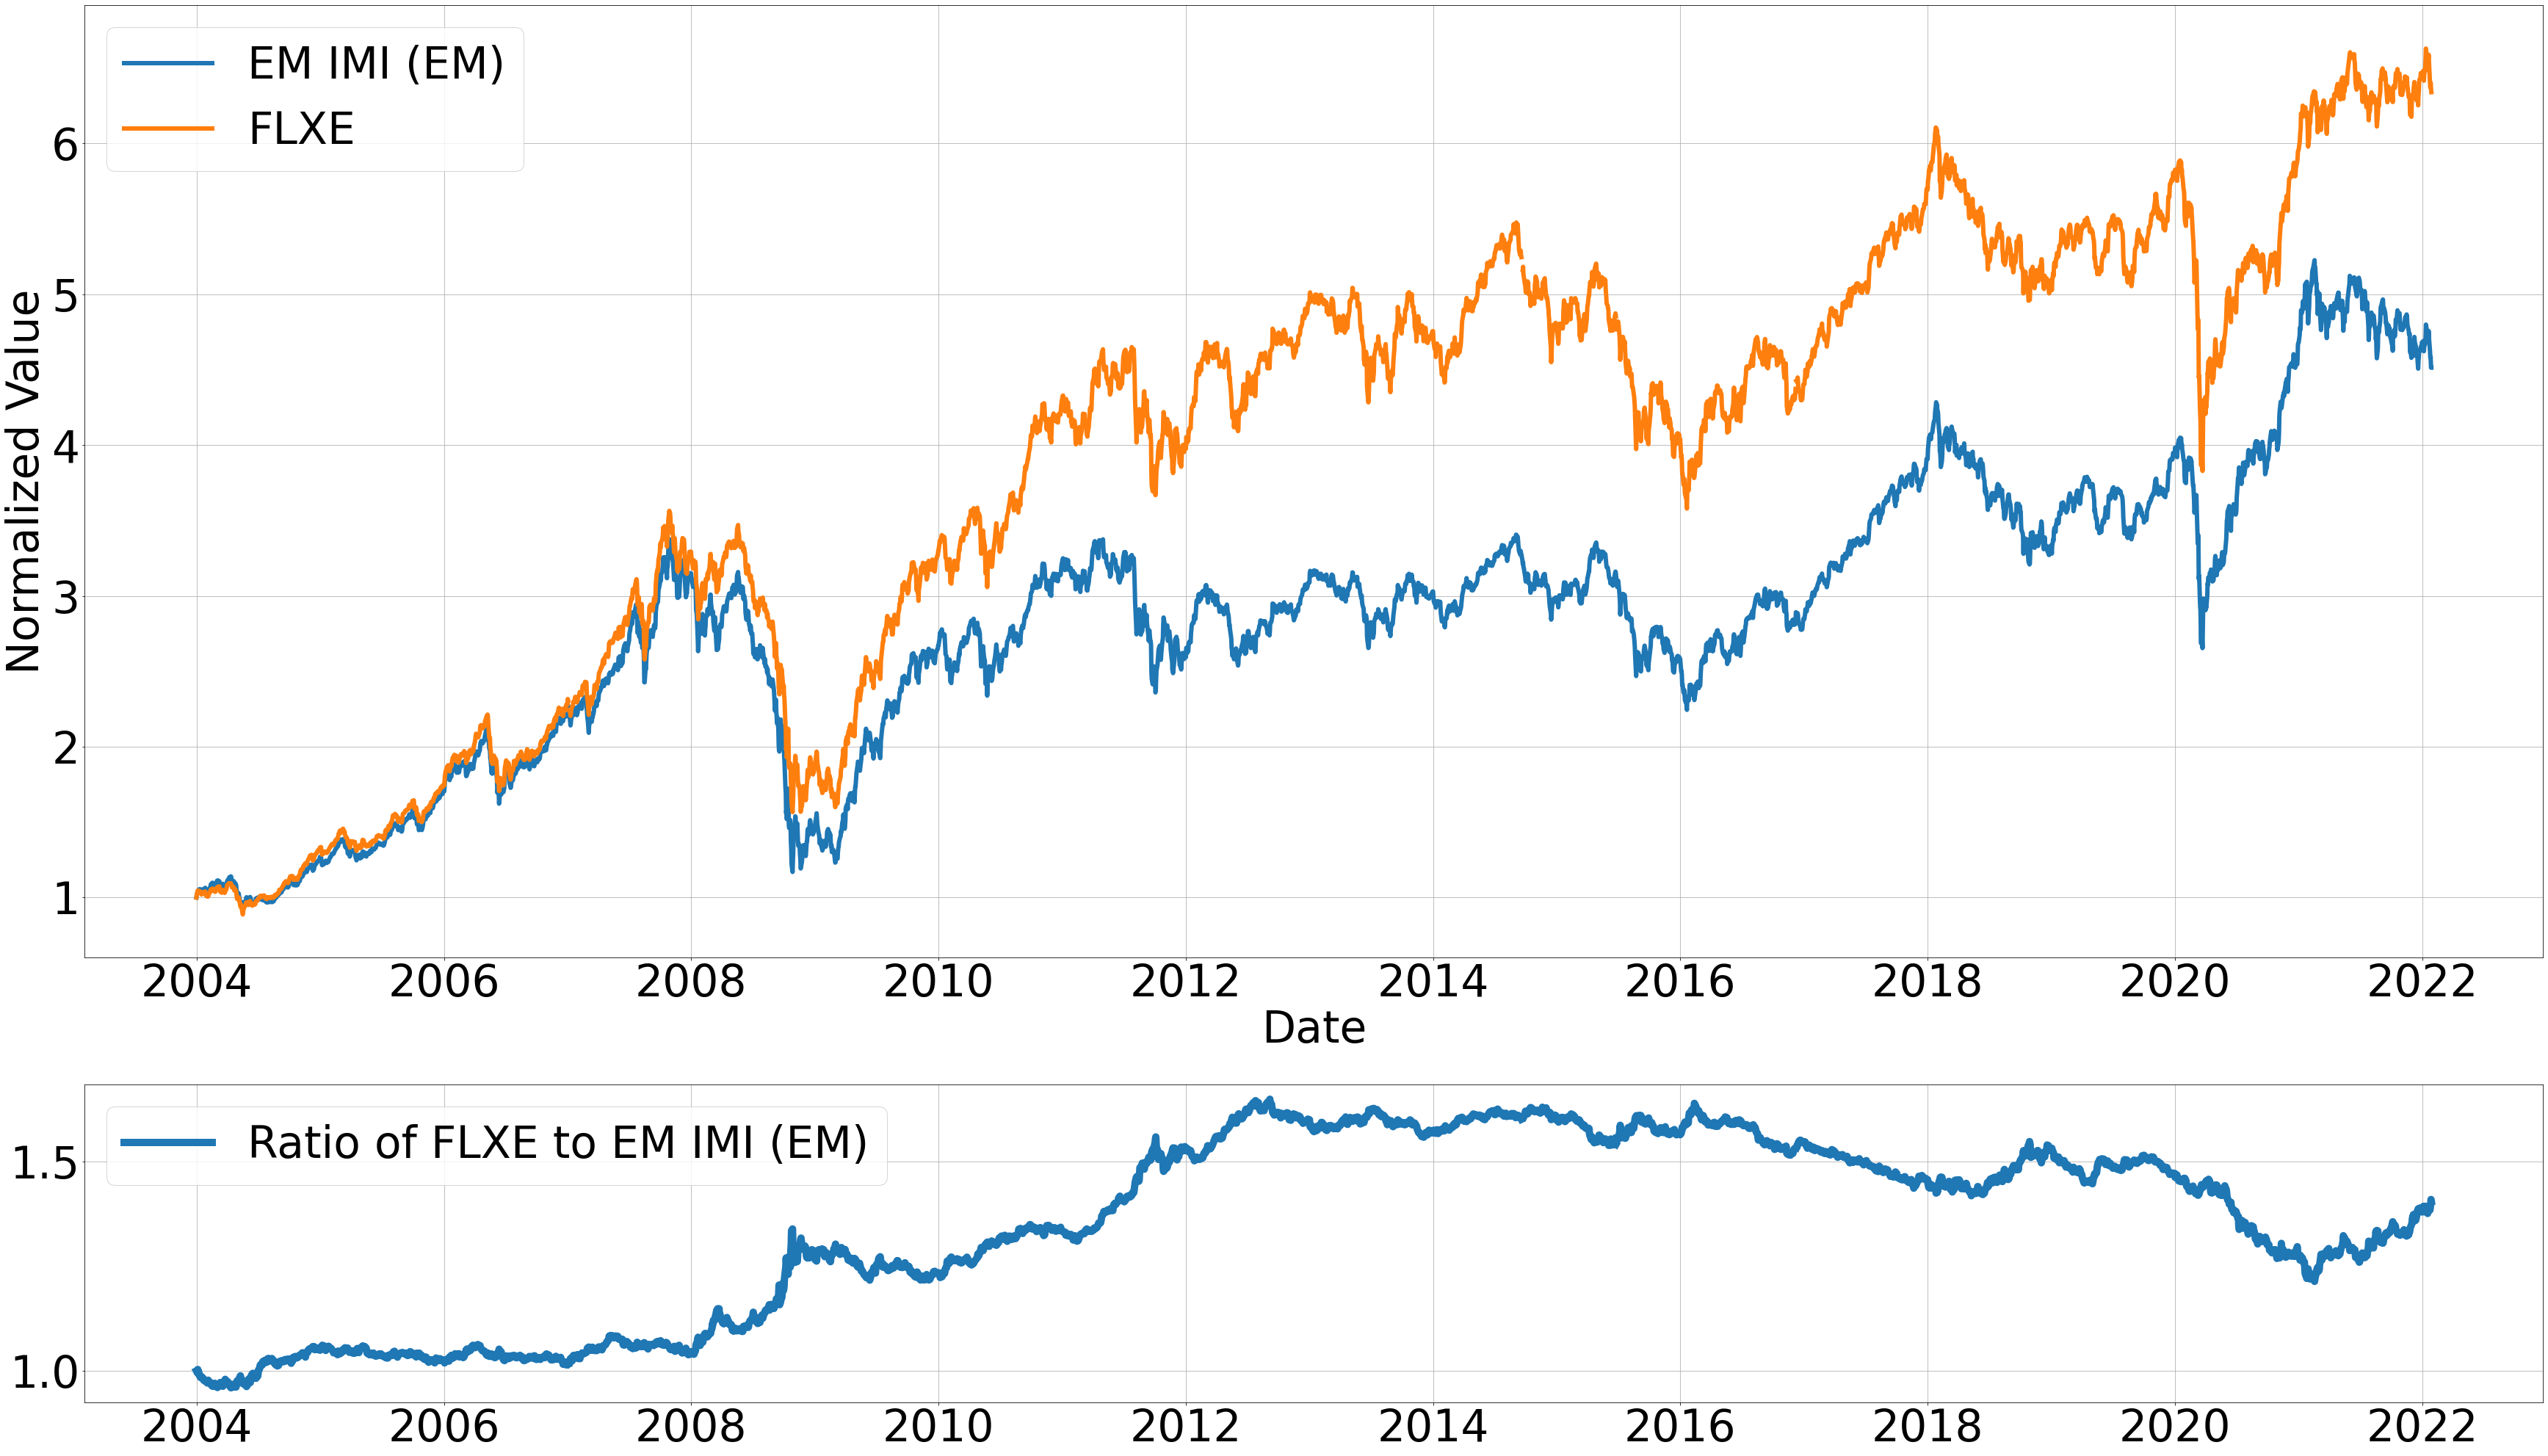

<Figure size 1440x864 with 0 Axes>

In [23]:
comparison_plot("FLXE","EM IMI (EM)")